In [12]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import plotly.express as px

# Data Acquisition

In [13]:
diabetes_data = pd.read_csv('diabetes2.csv')

In [14]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Info about each column

#### Pregnancies
Number of pregnancies the individual has had.

#### Glucose
Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test.

#### BloodPressure
Diastolic blood pressure (mm Hg).

#### SkinThickness
Thickness of skinfold (mm) at the triceps.

#### Insulin
2-Hour serum insulin (mu U/ml).

#### BMI
2-Hour serum insulin (mu U/ml).

#### DiabetesPedigreeFunction
Diabetes pedigree function, which represents the likelihood of diabetes based on family history.

#### Age
Age of the individual (years).

#### Outcome
Binary label indicating whether the individual has diabetes (1) or not (0).

In [15]:
#info about the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- The above data has no null values
- It has all numerical data that can be transformed if needed

In [17]:
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [18]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- It can be seen from this dataset that there are more 'Negative' Outcomes than 'Positive' ones

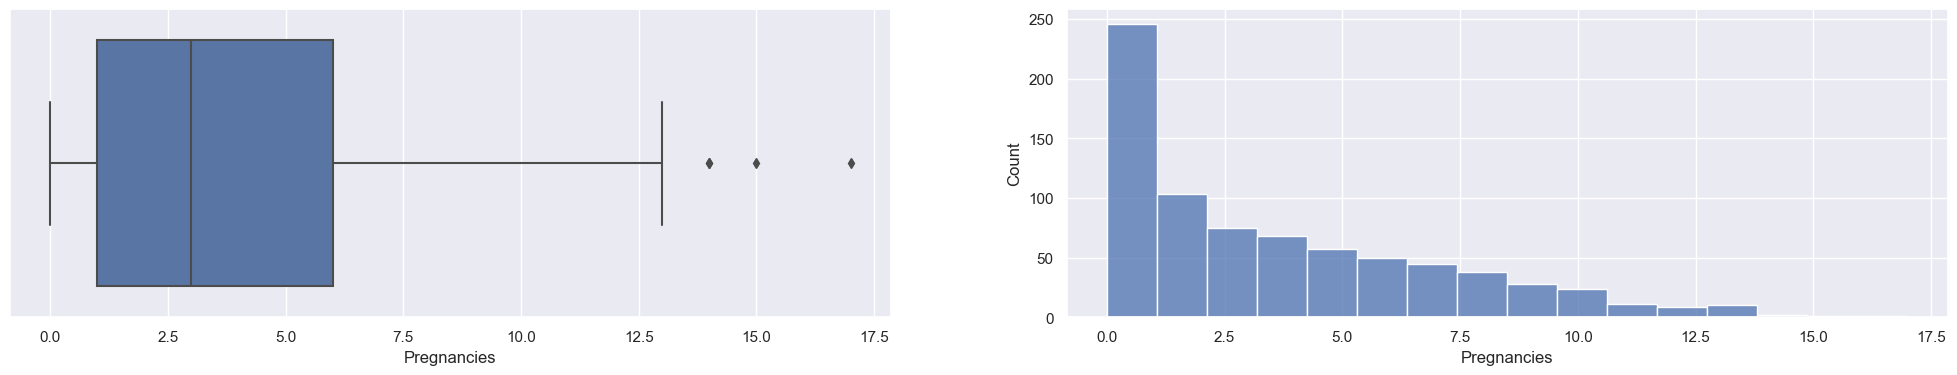

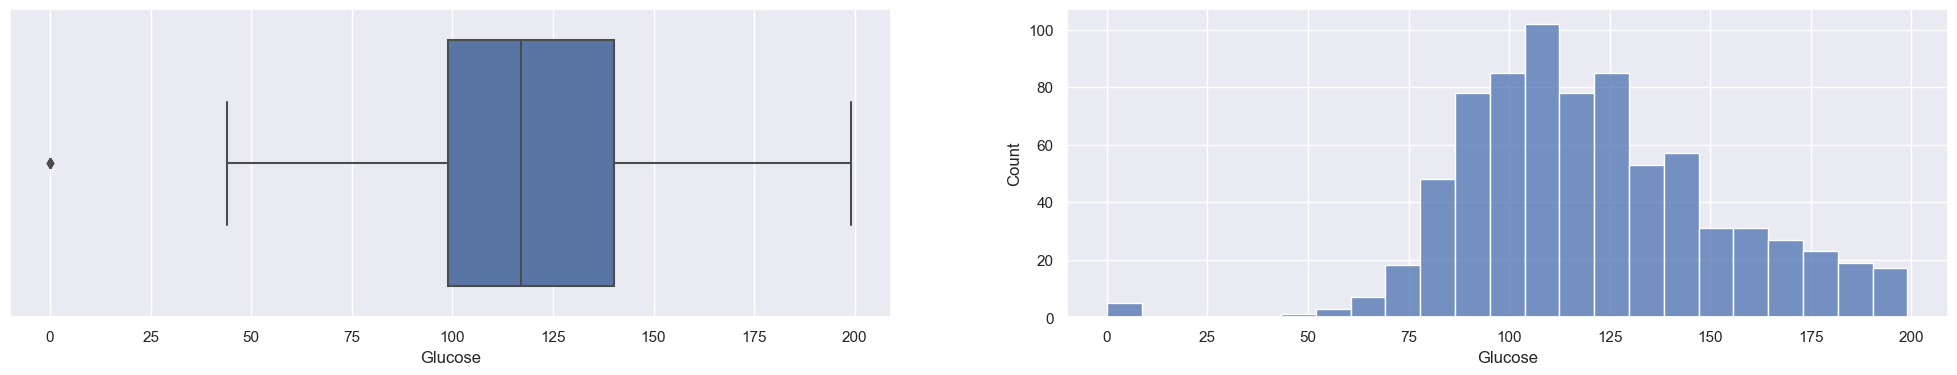

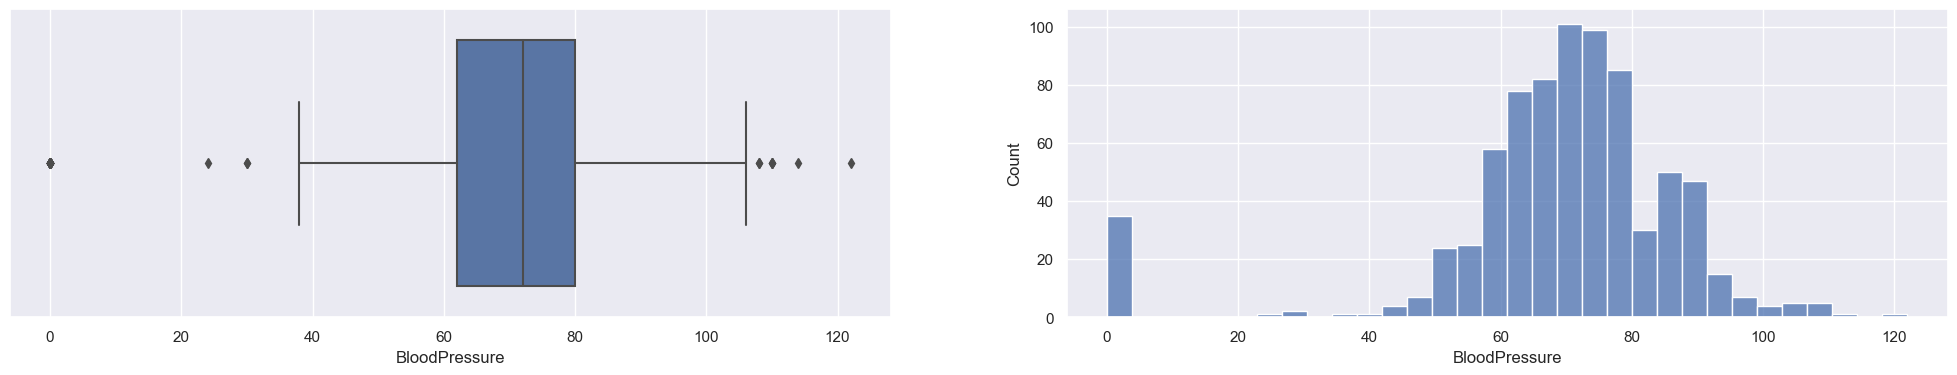

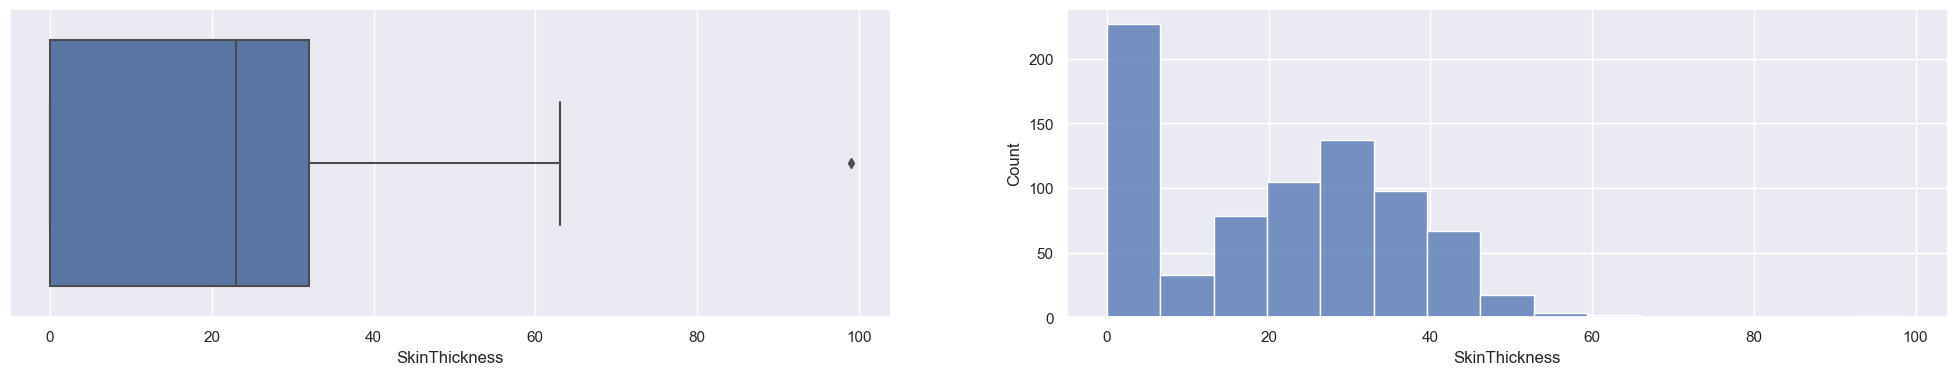

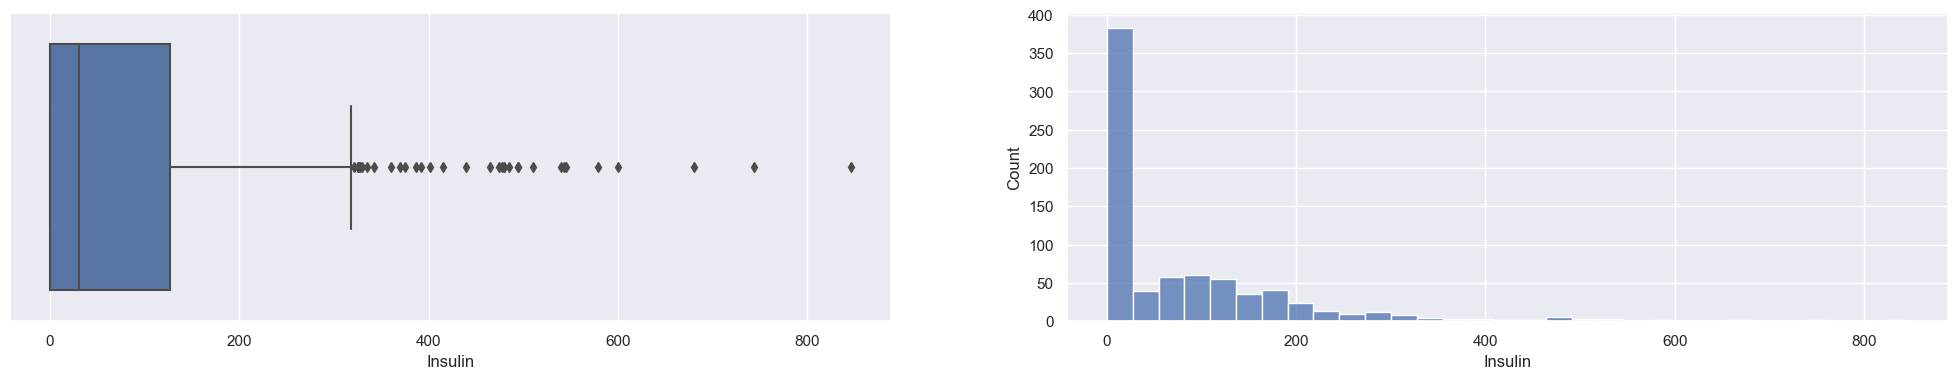

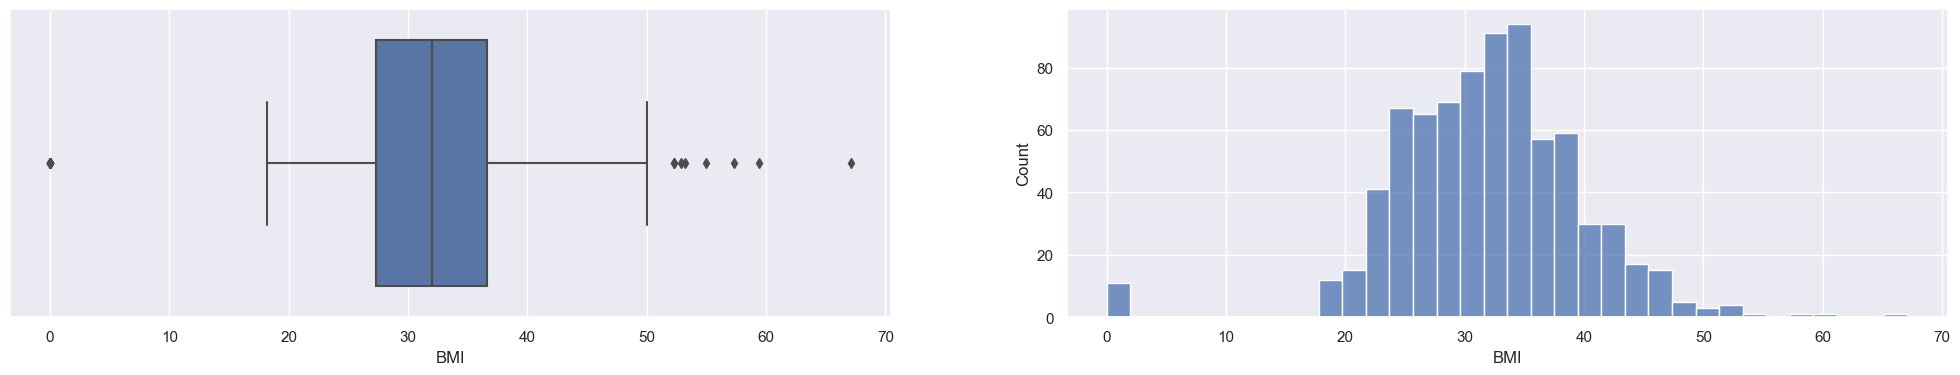

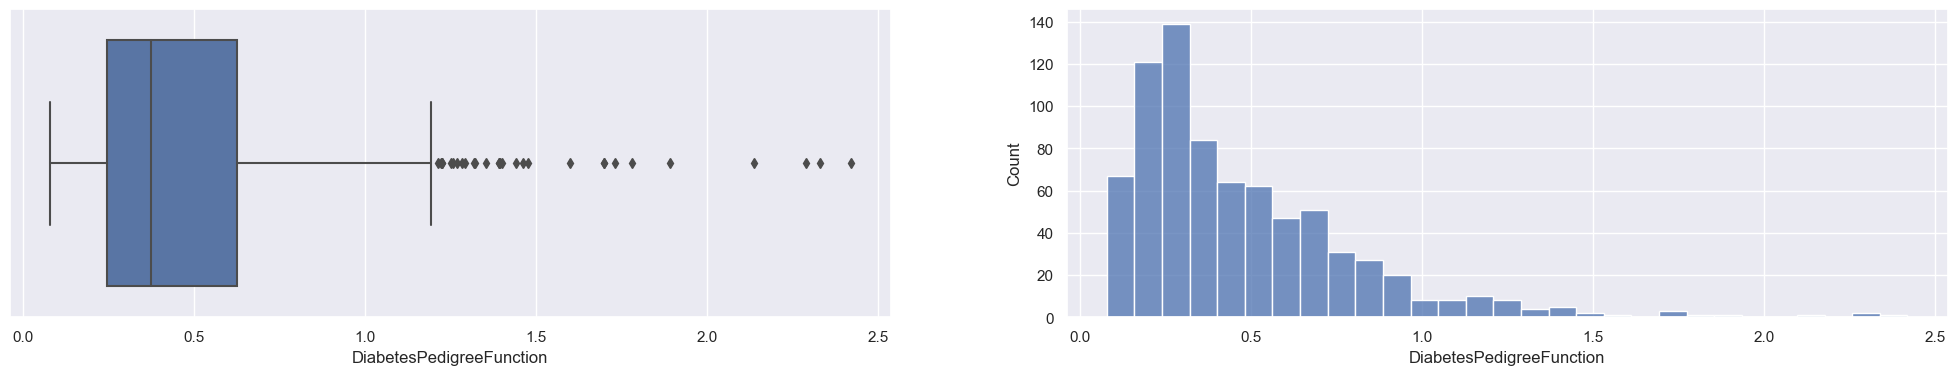

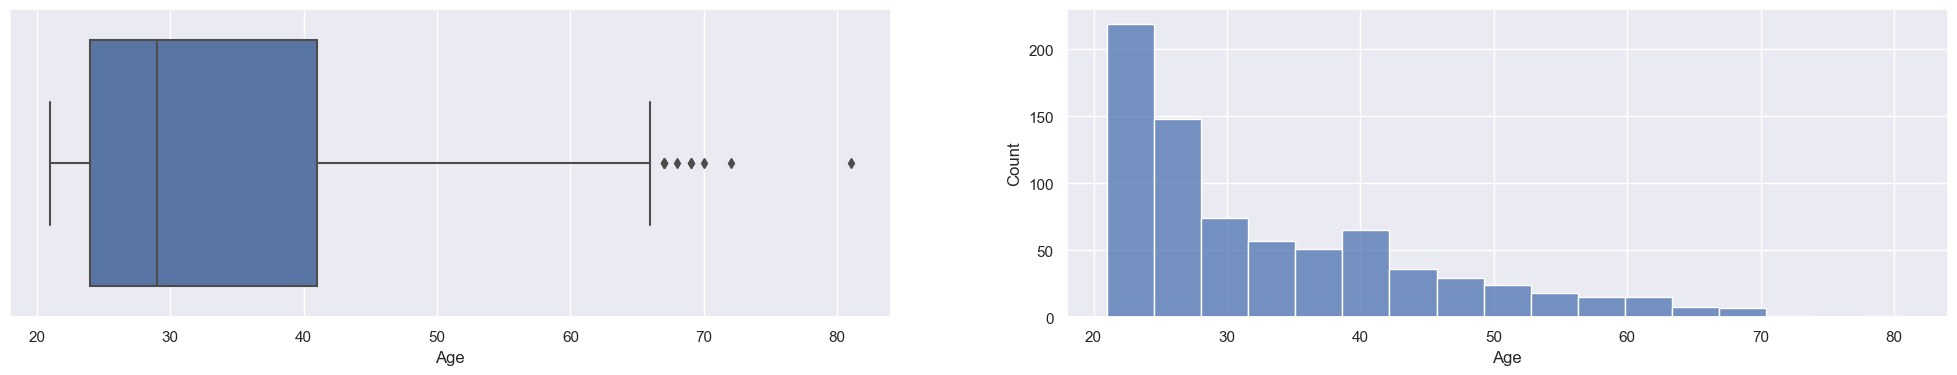

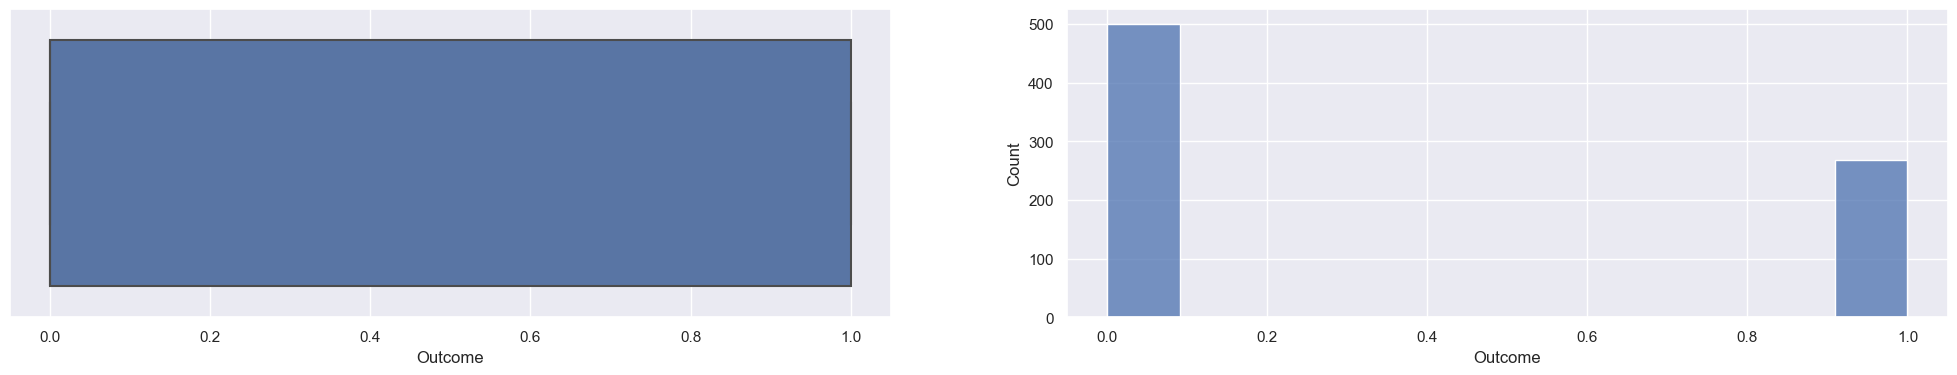

In [19]:
#Uni-variate description
def Univariate_boxplot (data,column):
    f, axes = plt.subplots(1, 2, figsize=(25, 4))
    sb.boxplot(x = column,data = data, orient = "h", ax = axes[0])
    sb.histplot(data = data,x = column, ax = axes[1])
for columns in diabetes_data :
    Univariate_boxplot (diabetes_data,columns)

- Glucose, BloodPressure and BMI has a more normal distribution.
- Pregnancies, SkinThickness, DiabetesPedigreeFunction and Age are skewed positively.
- Outcome had no distribution of any sort.
- BMI, Insulin and DiabetesPedigreeFunction have numerous outliers in their boxplot compared to the other variables.

# Exploratory Analysis 

<Axes: >

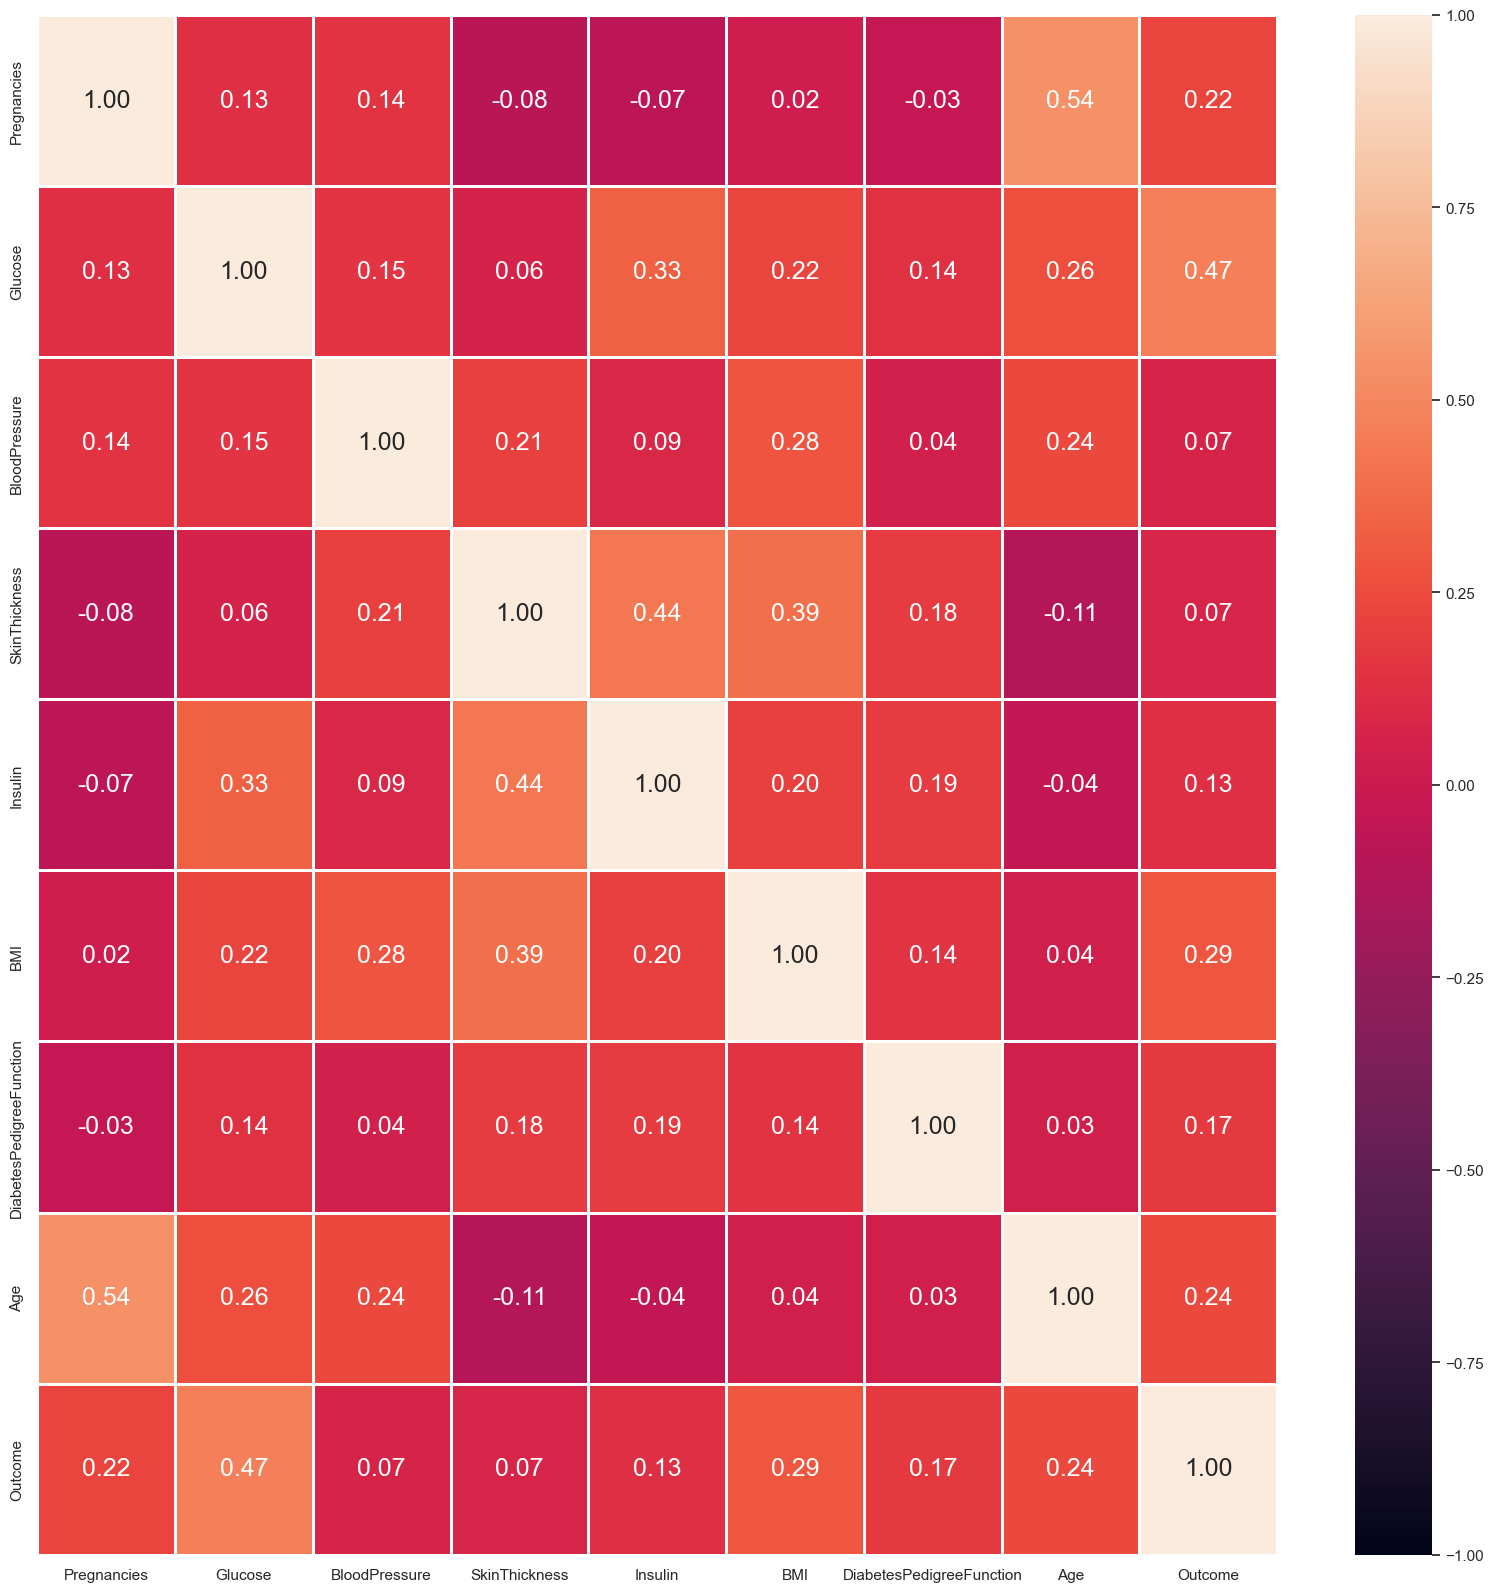

In [20]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(diabetes_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18})

In [21]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


- From the correlation matrix, the Outcome have a slightly higher positive correlations to the variables, Glucose, BMI and Age.
- Their correlation coefficient is 0.47, 0.29 and 0.24 respectively.

#### Relationship of other variables within each other
- We decided to explore the relationship of other variables through SkinThickness, as this variable has a higher correlation to all variables compared to others.


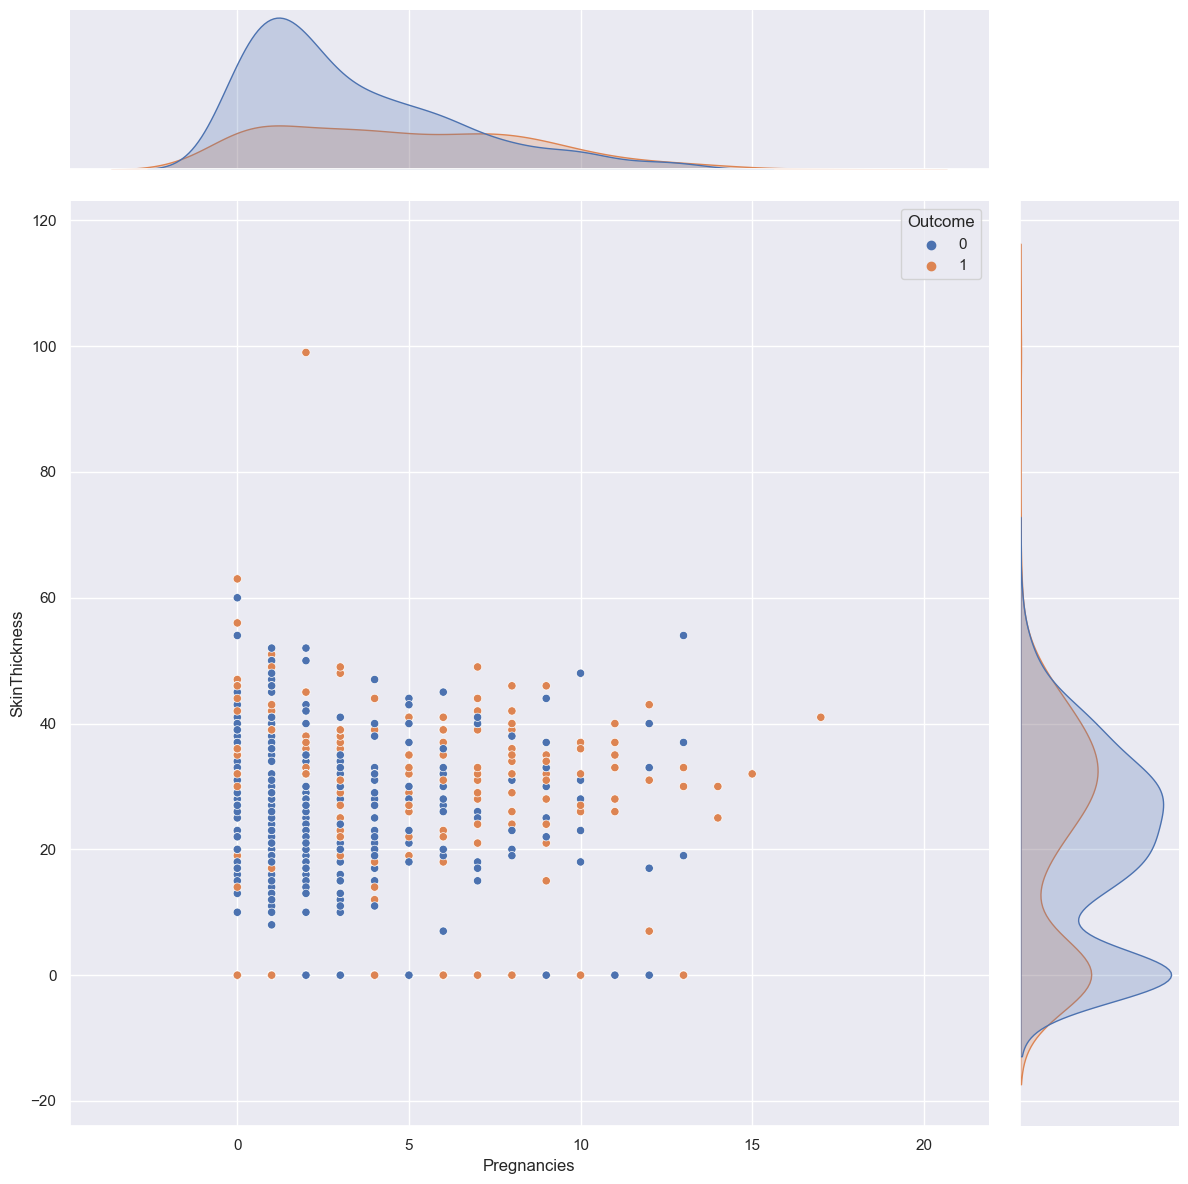

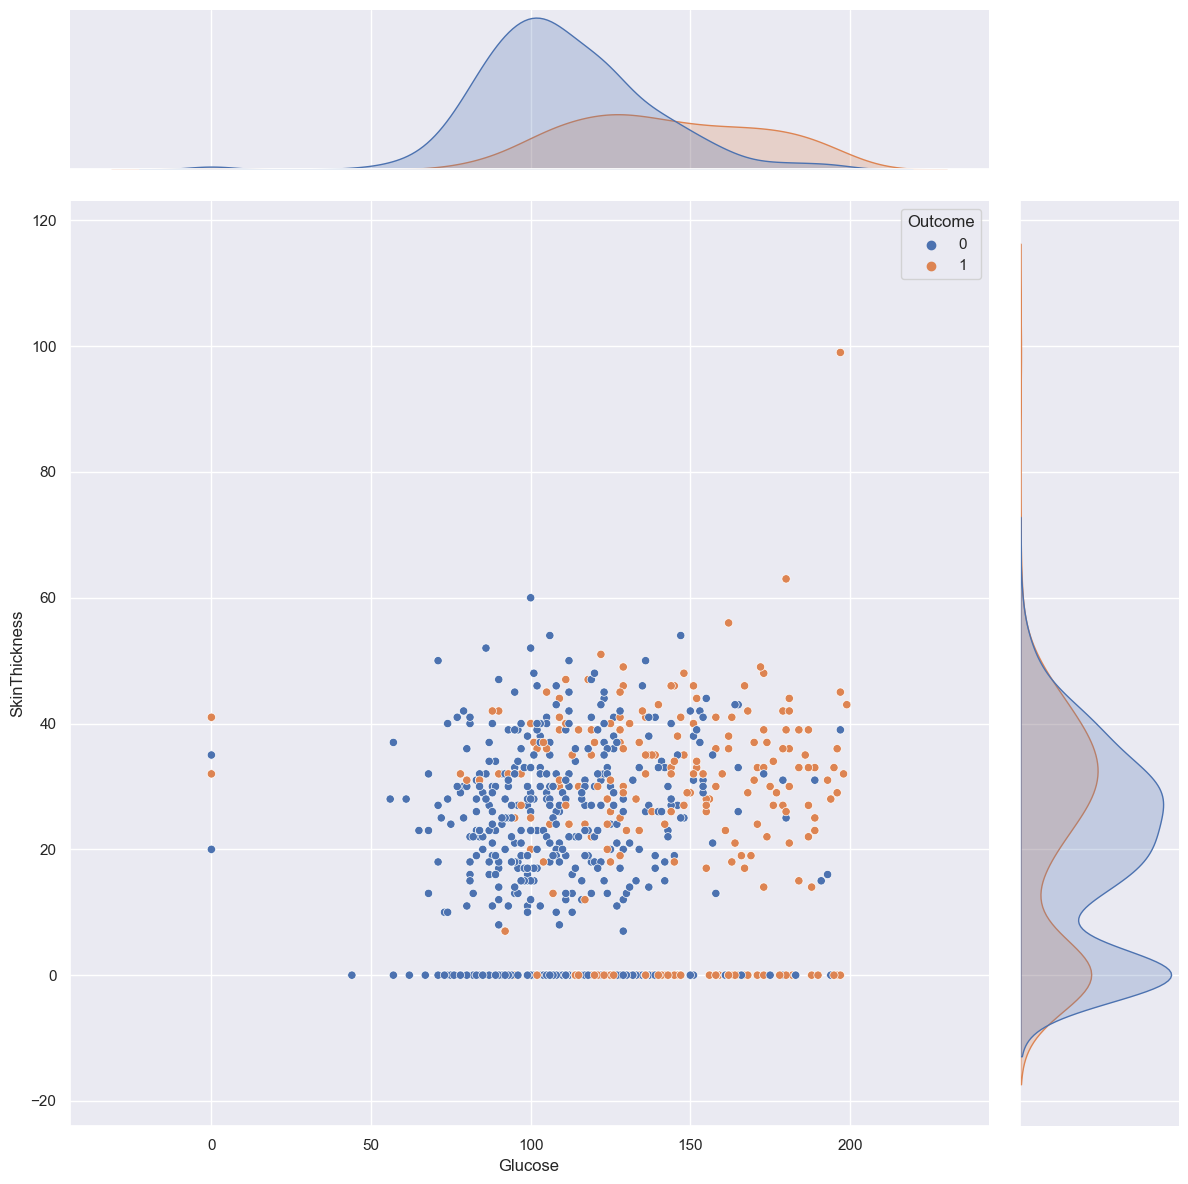

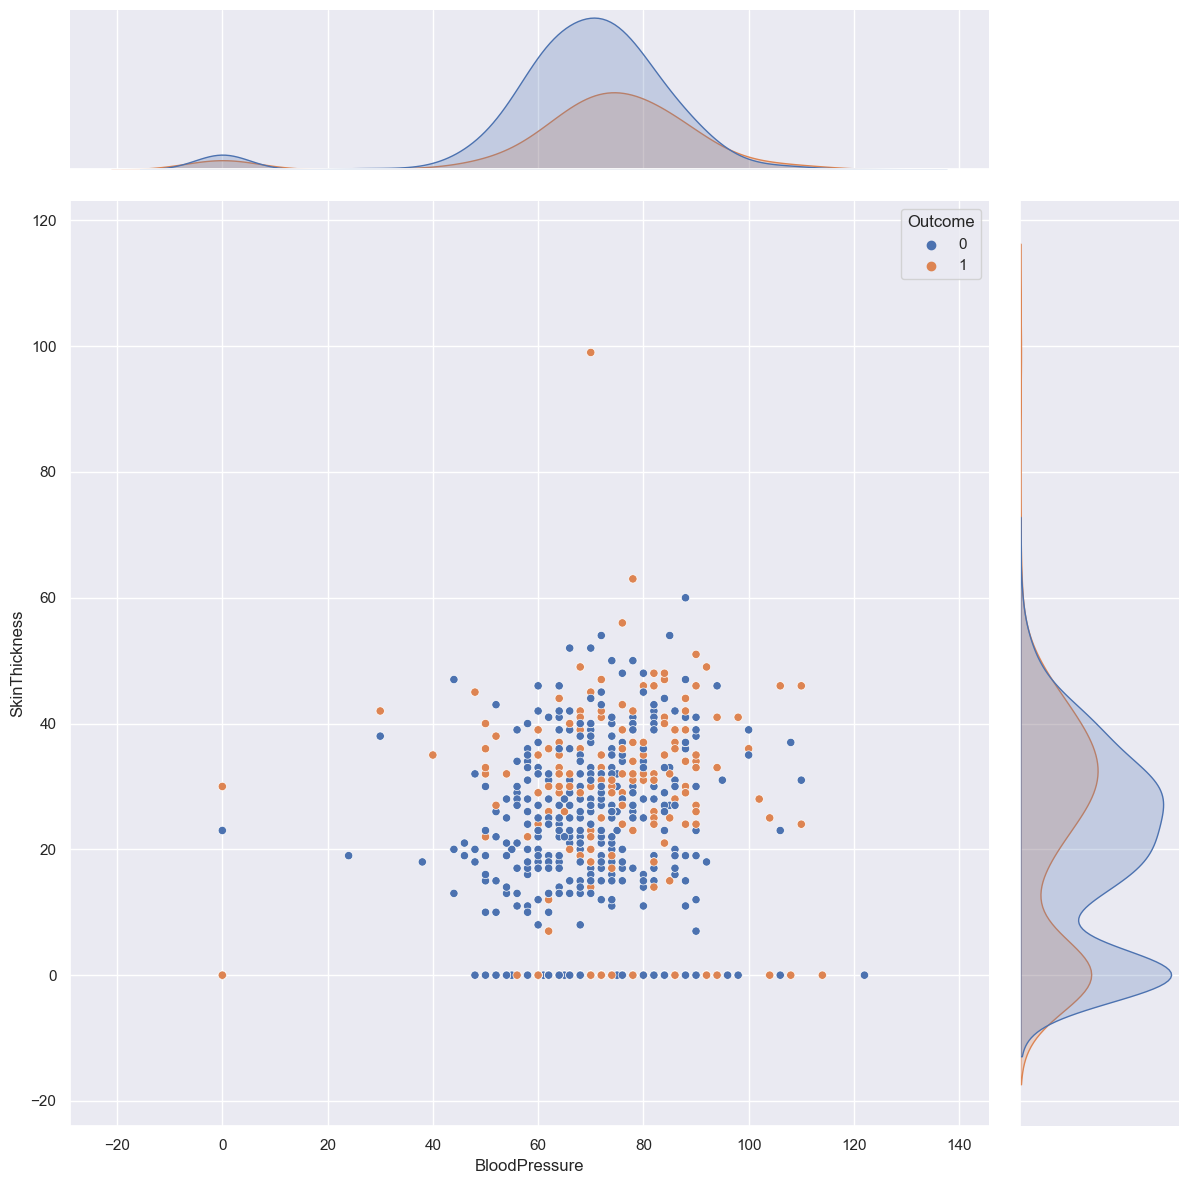

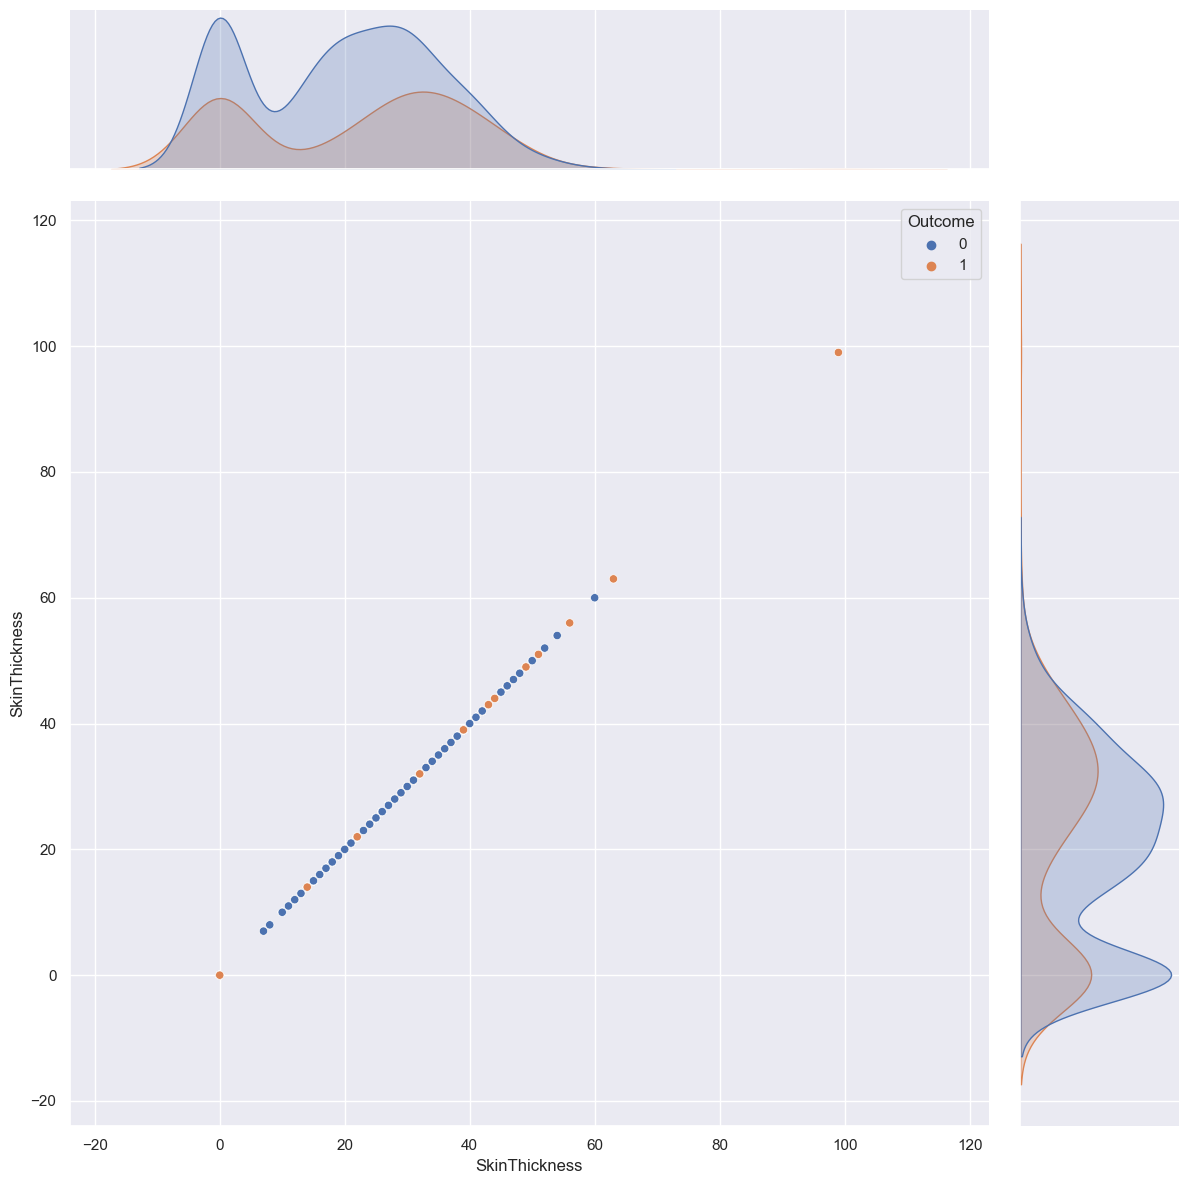

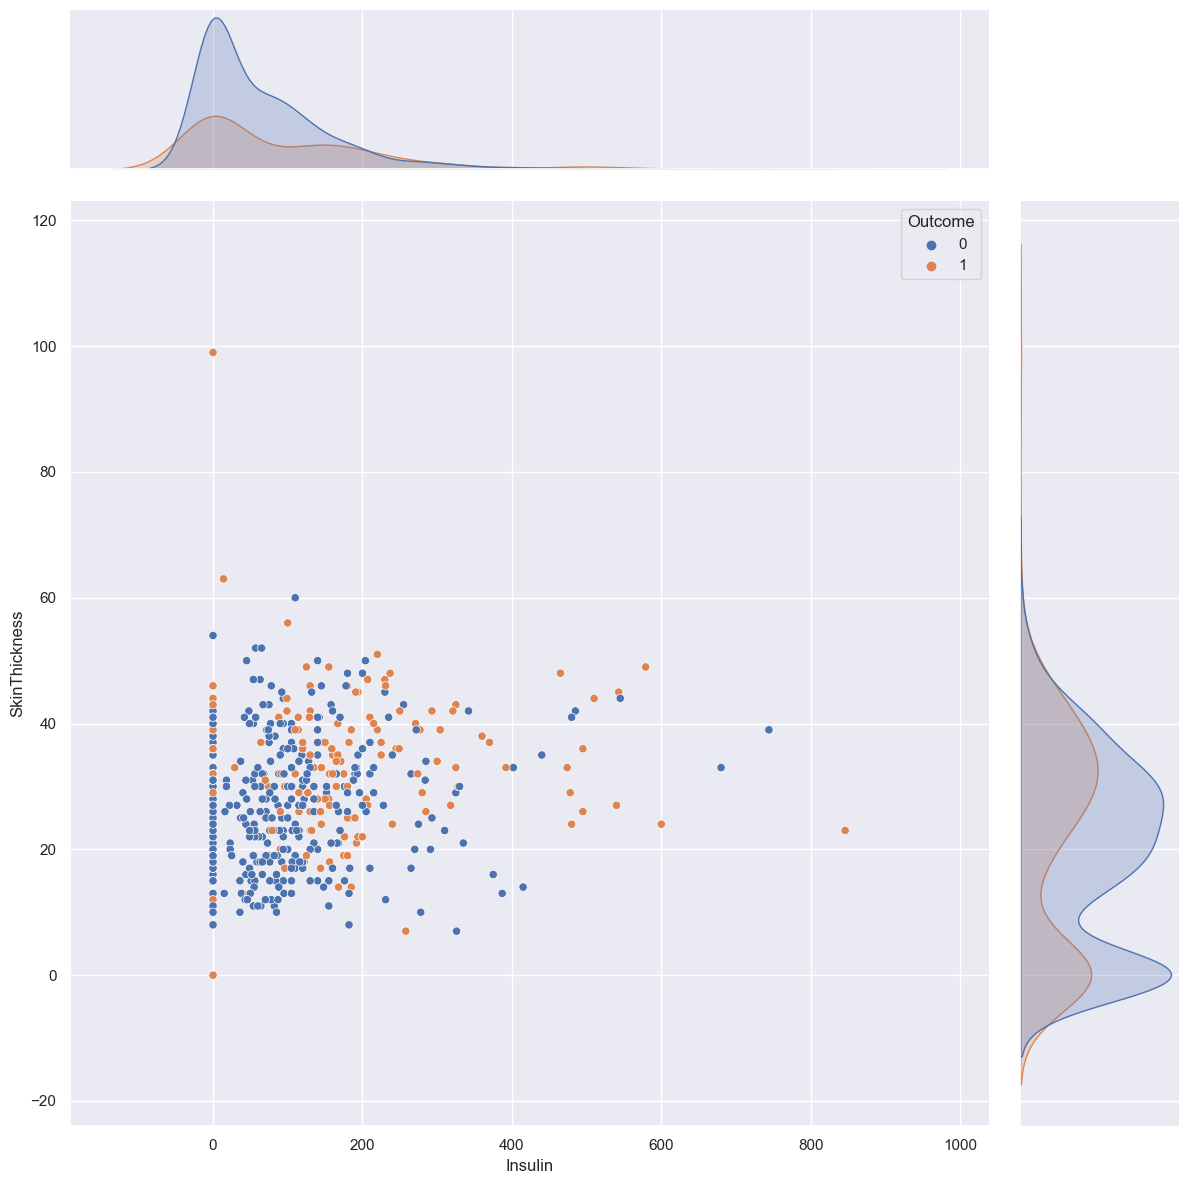

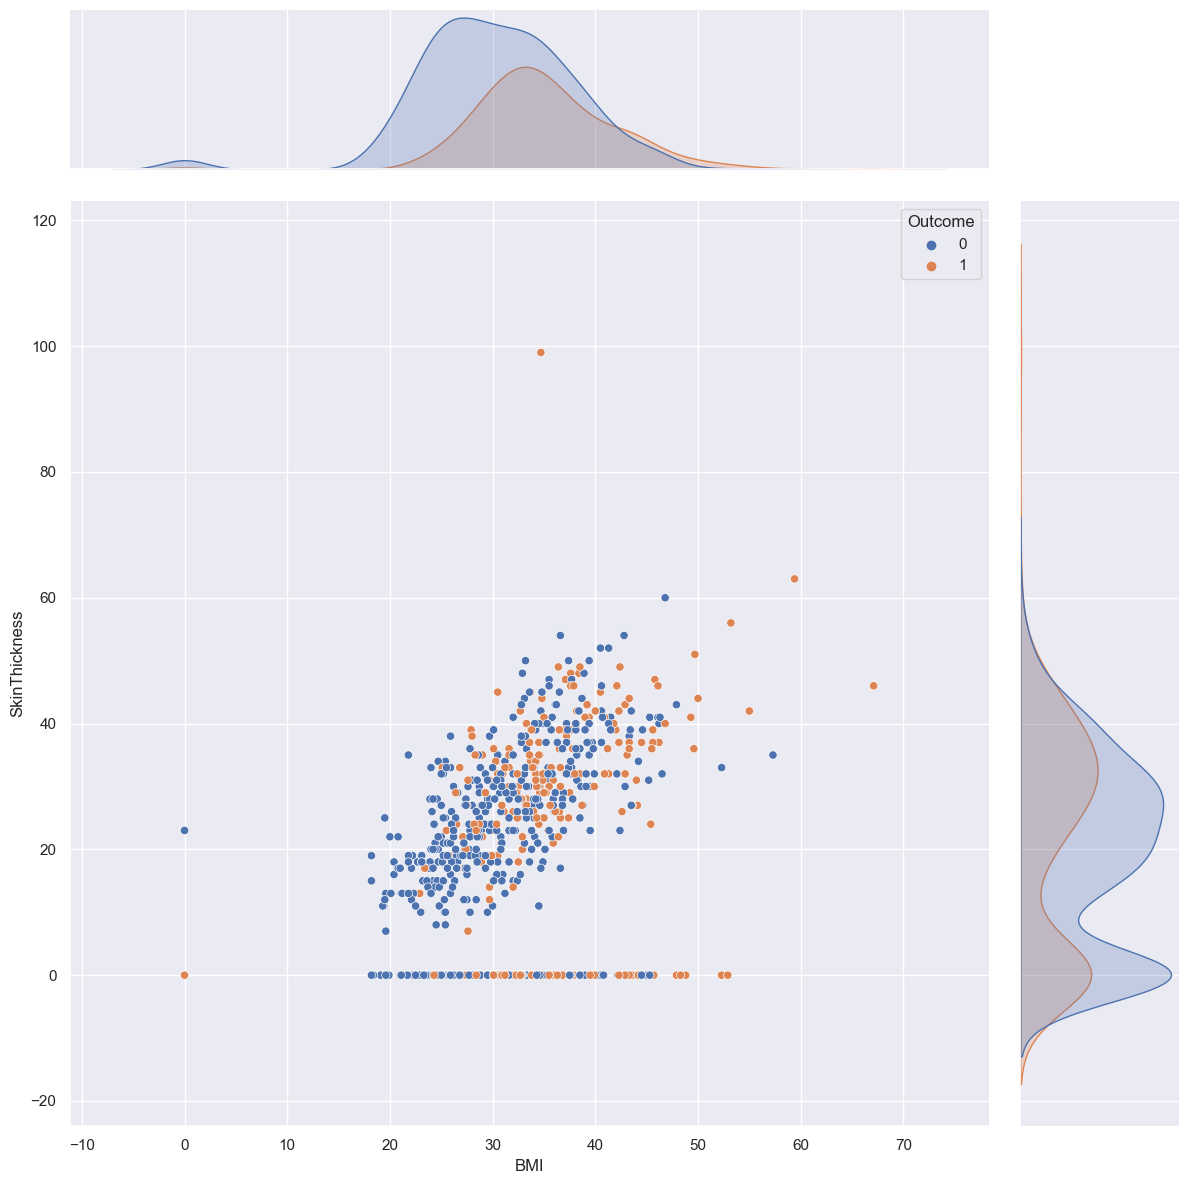

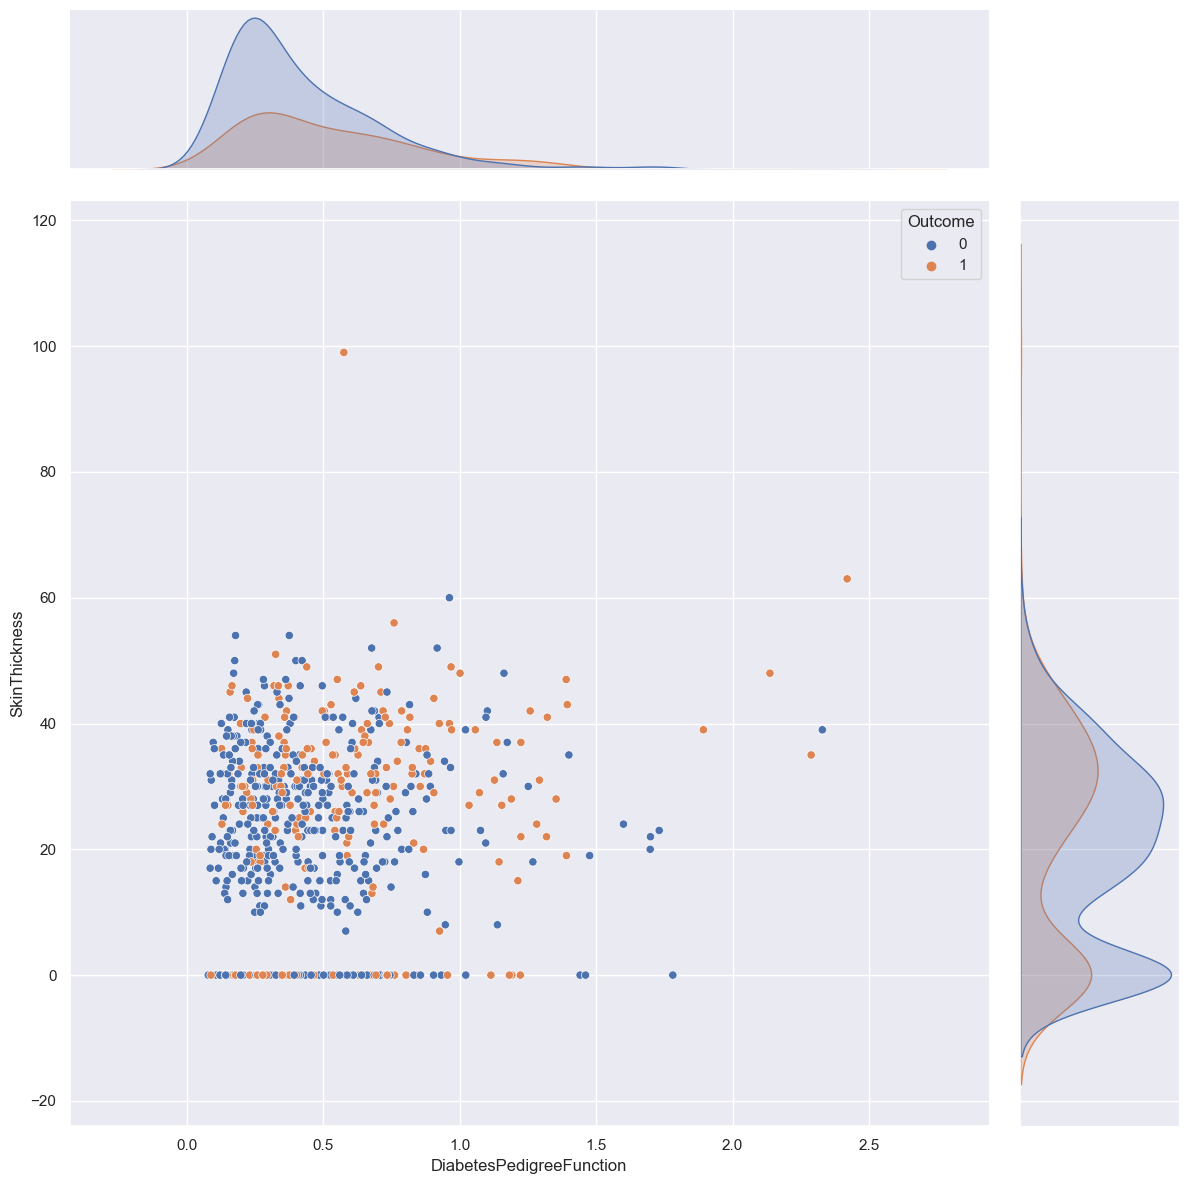

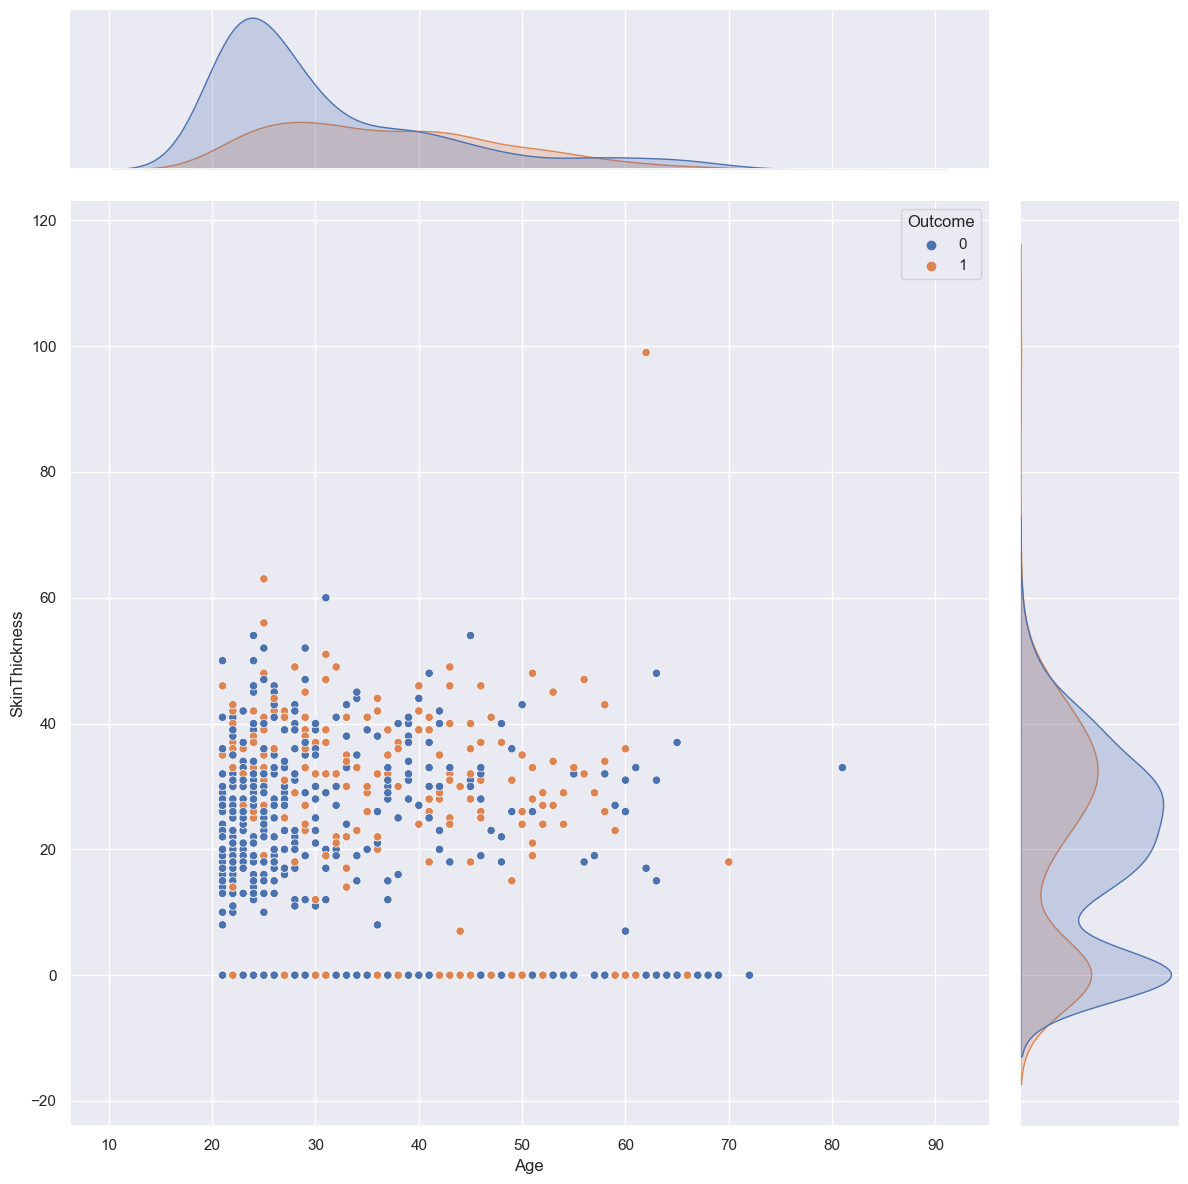

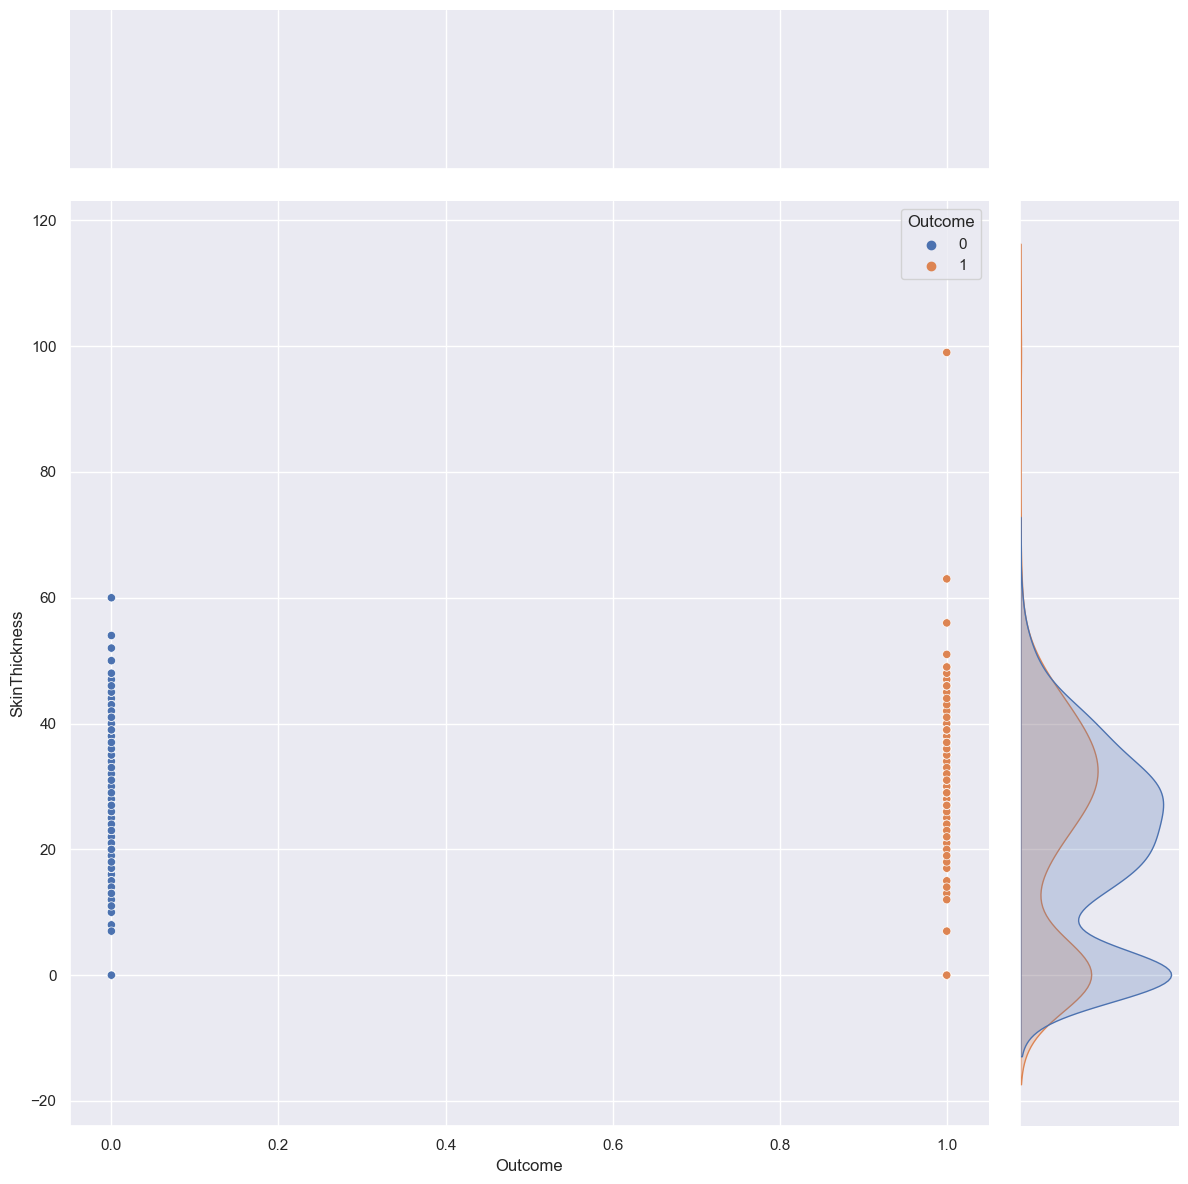

In [22]:
for columns in diabetes_data :
    sb.jointplot(data = diabetes_data, x = columns, y = 'SkinThickness', hue = 'Outcome', height = 12)


- From the joint plots shown, the graphs of SkinThickness against Glucose, BloodPressure, Insulin, BMI, DiabetesPedigreeFunction, Age show that they have some positive correlation to each other which can be seen. Yet, interestingly Outcome and SkinThickness only has a correlation coefficient of 0.07.

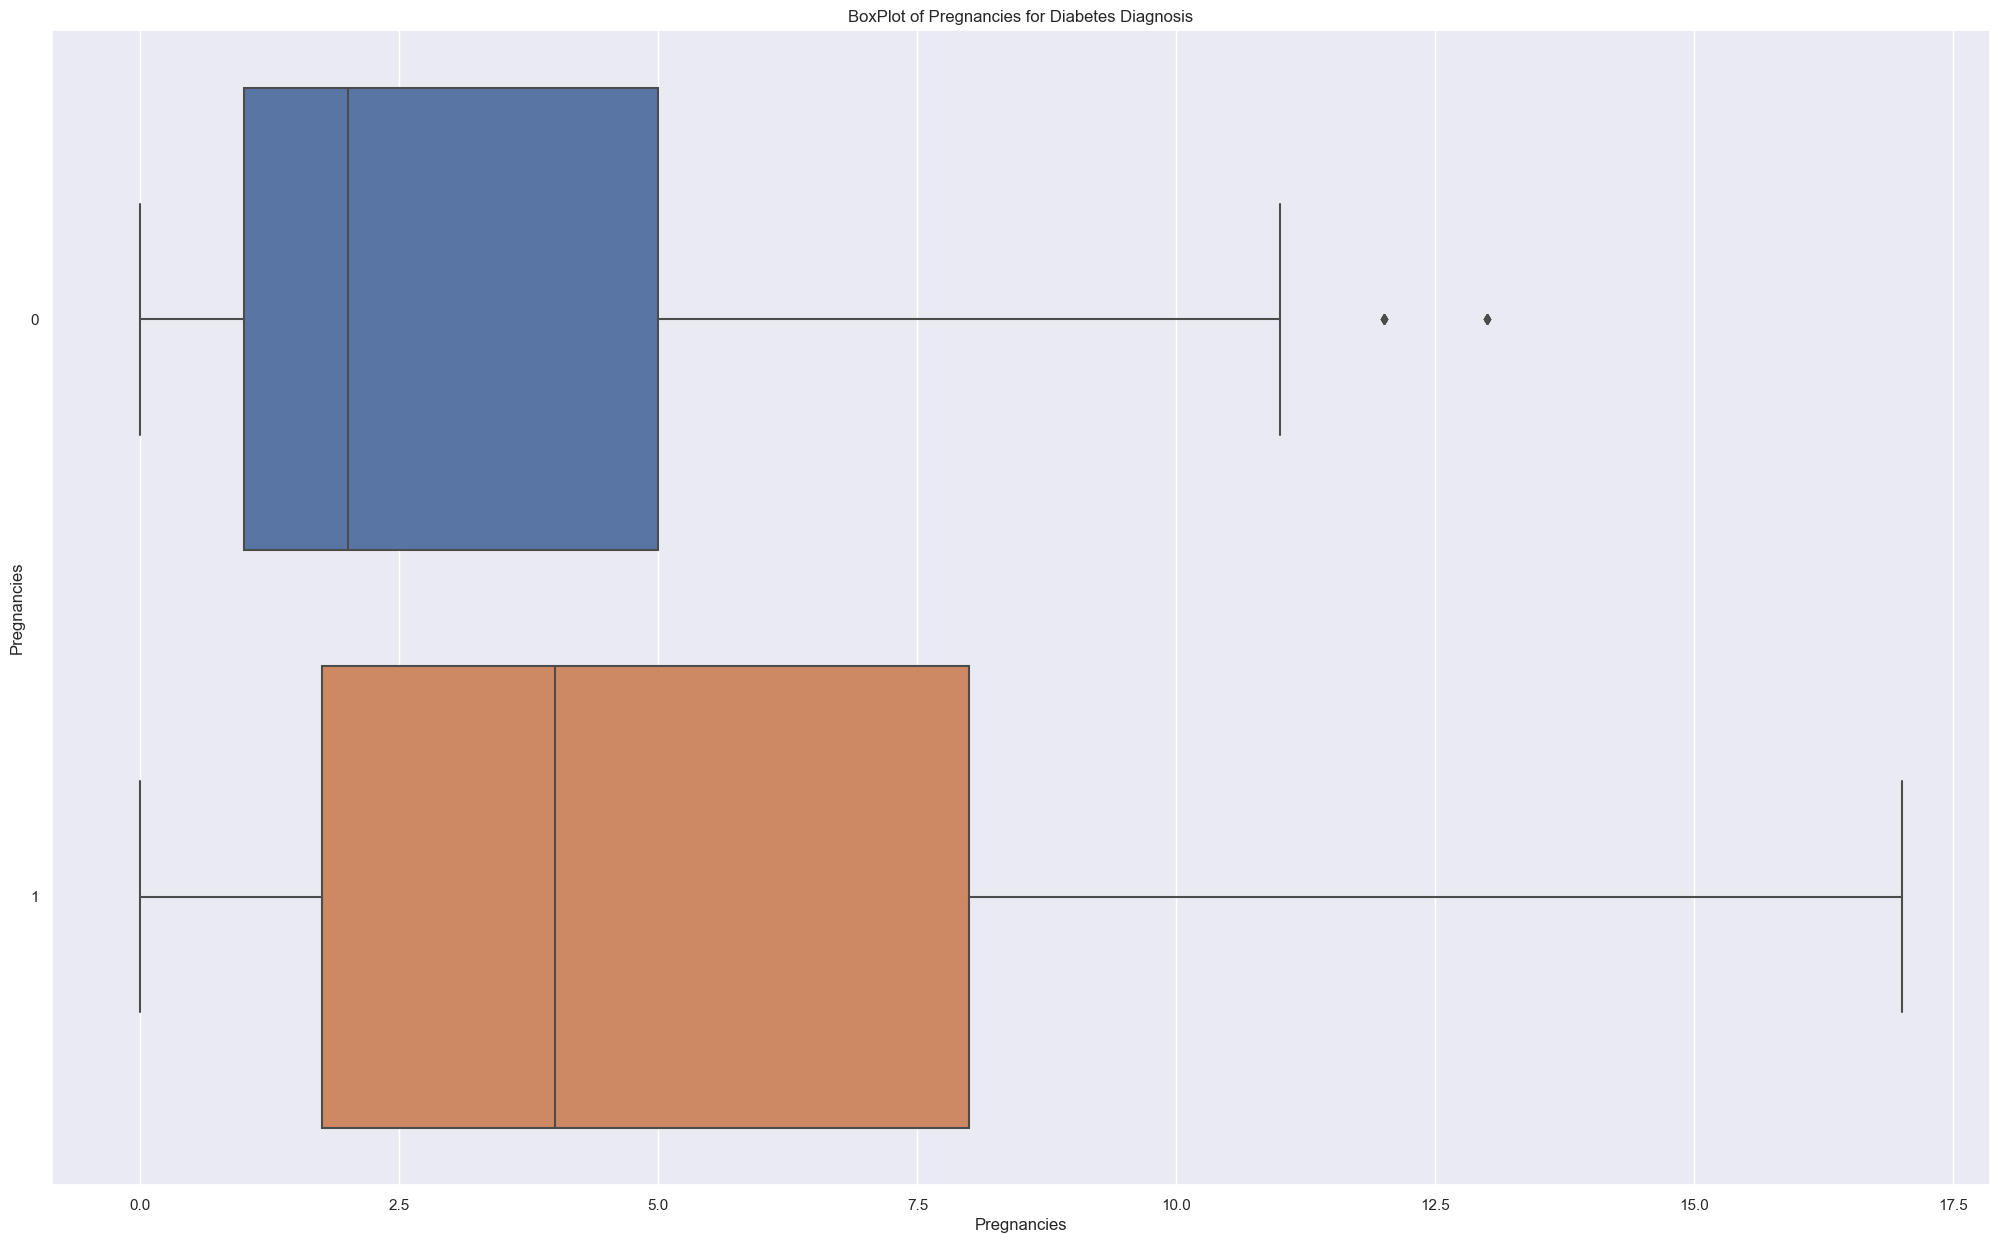

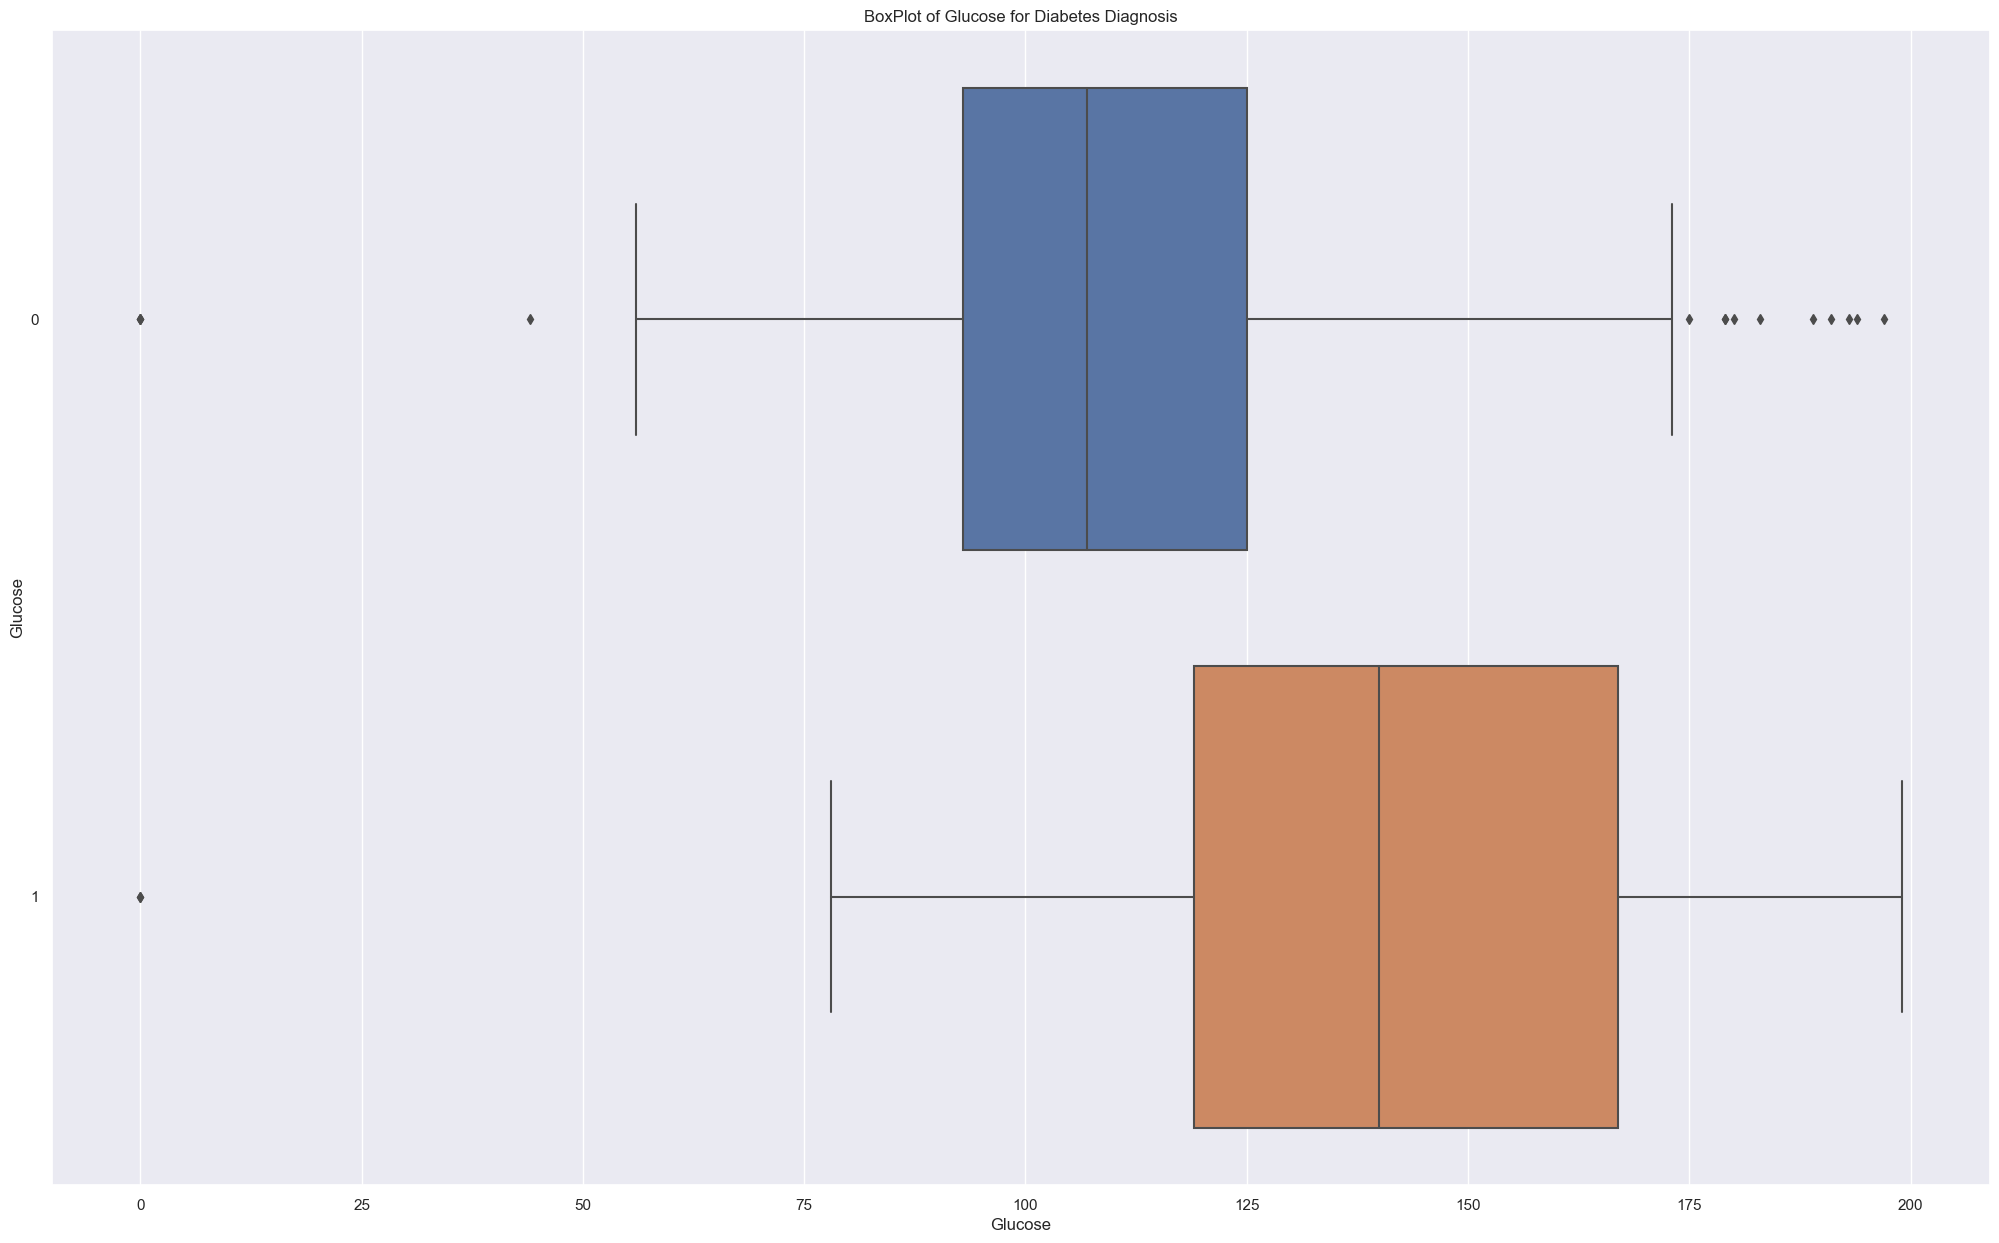

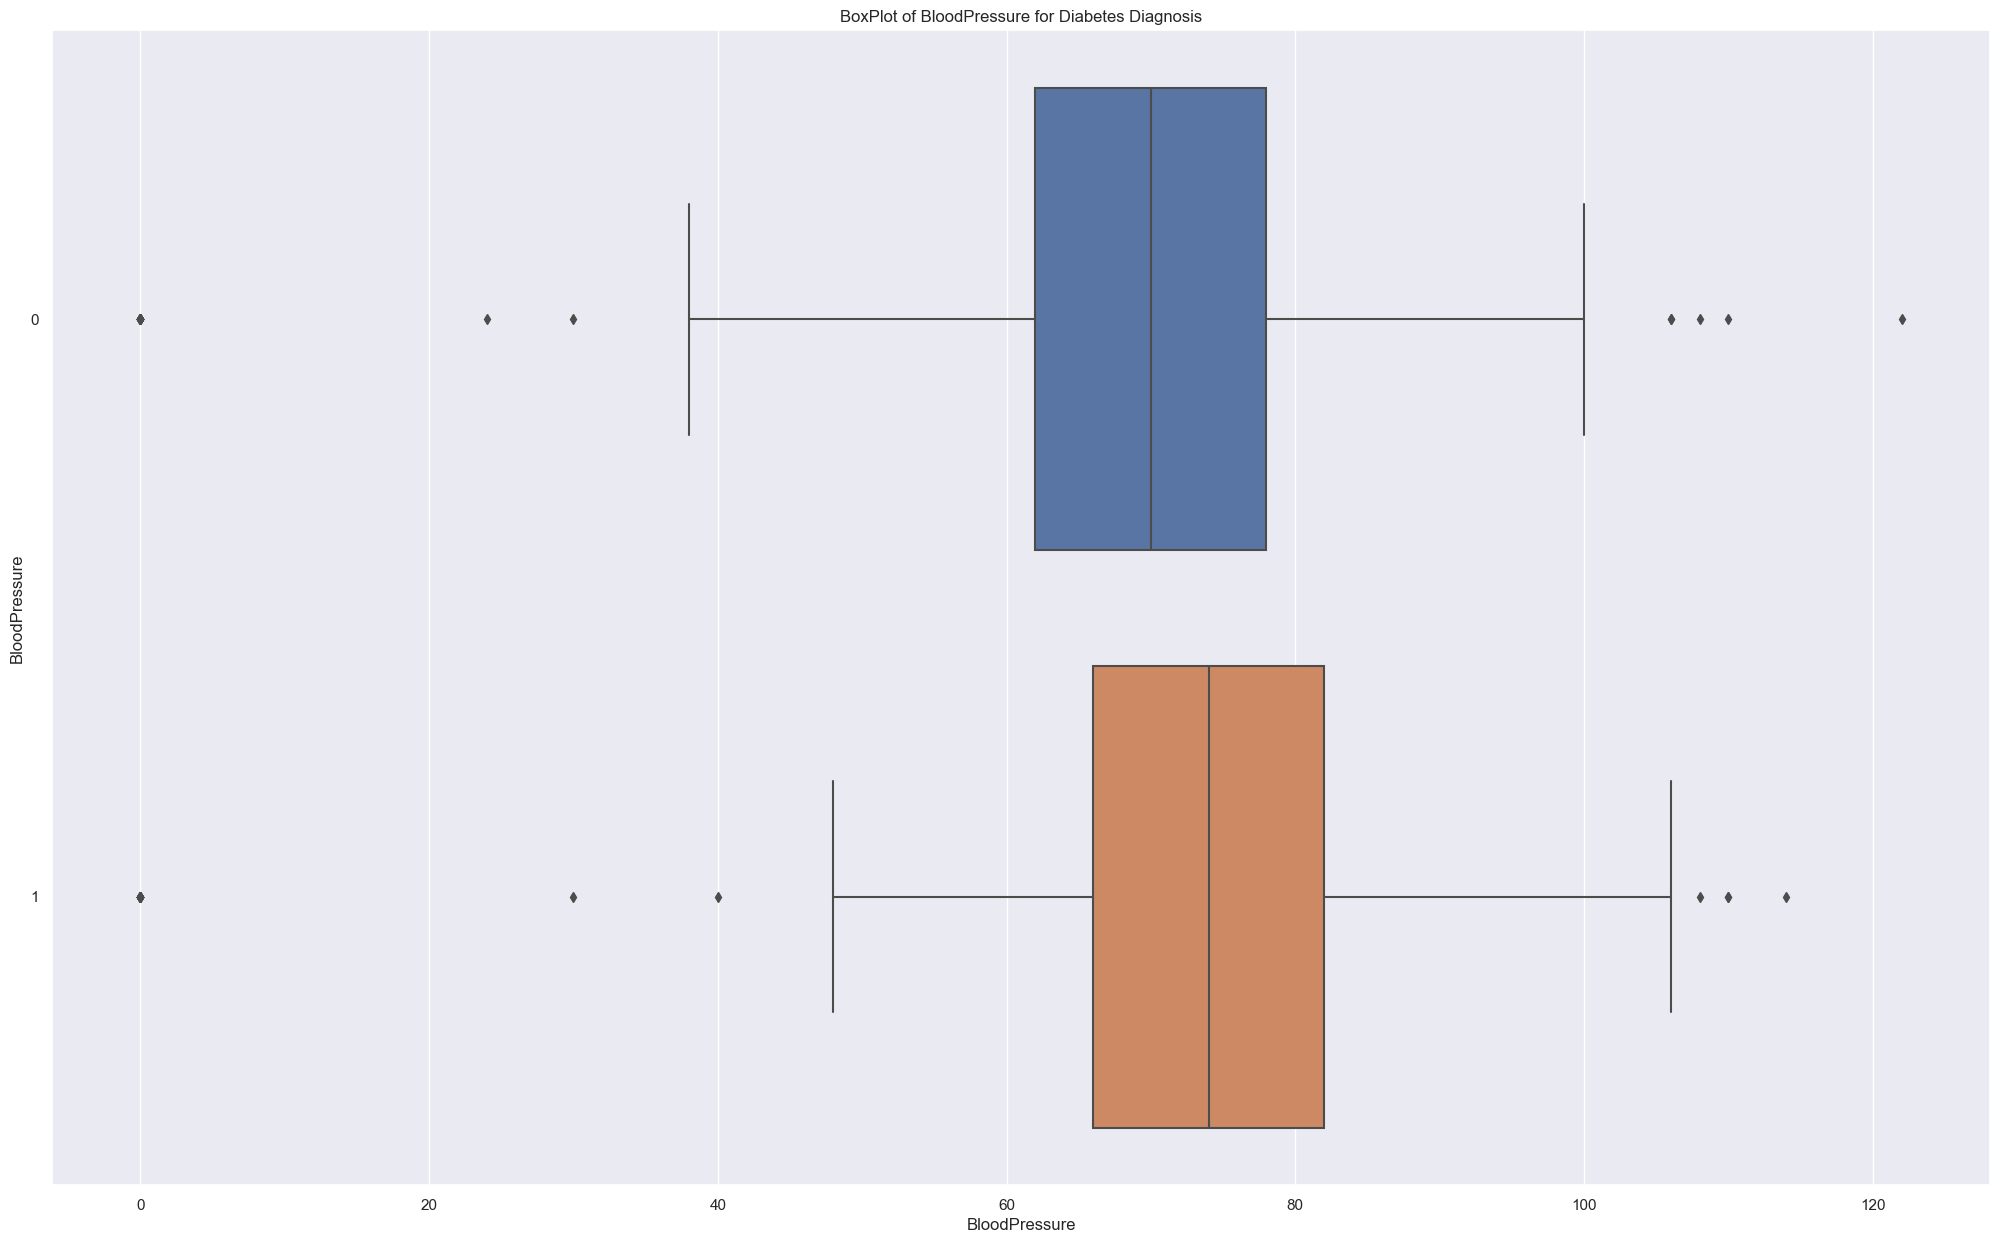

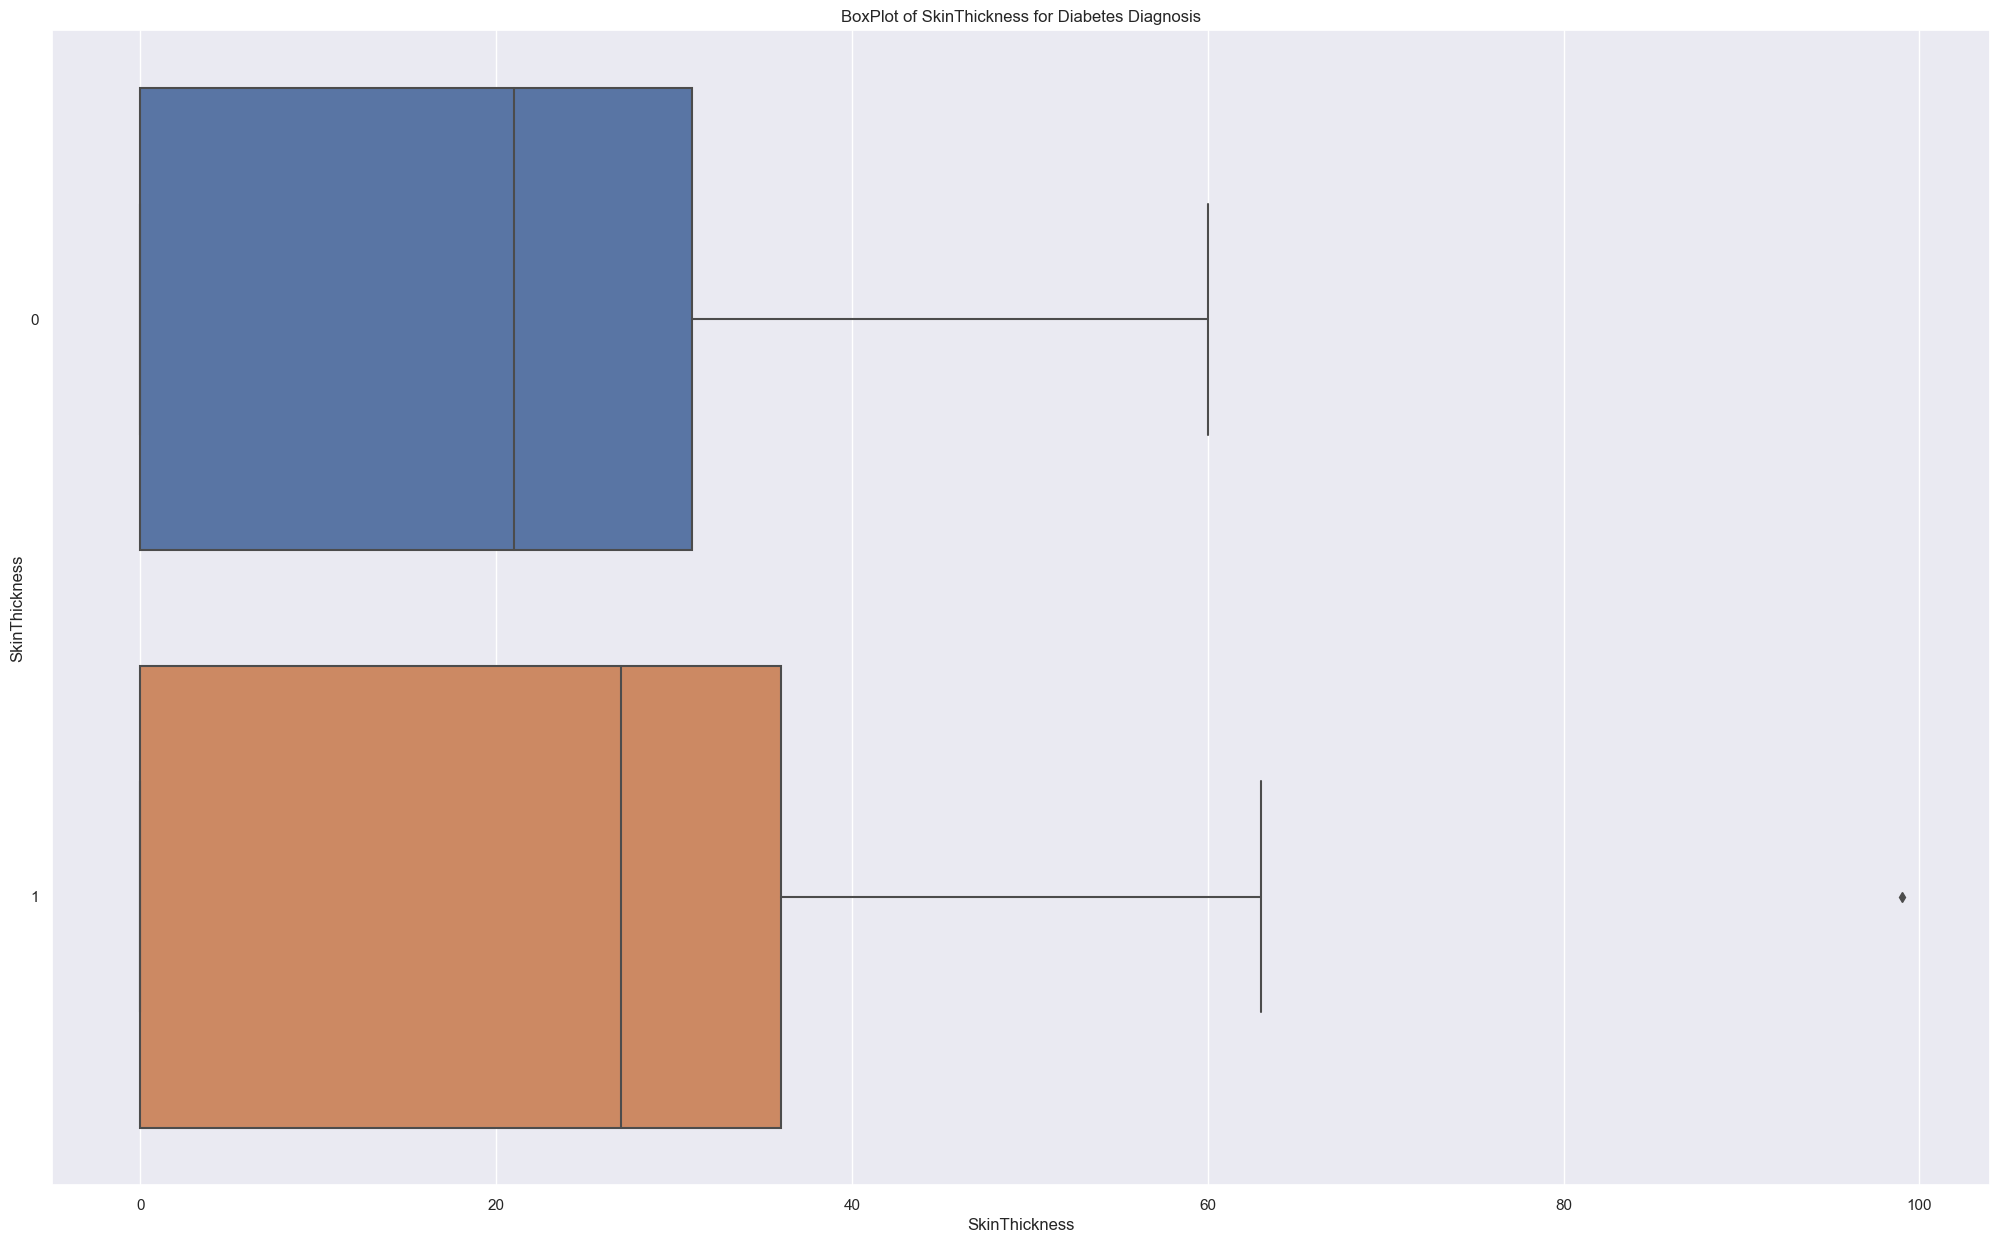

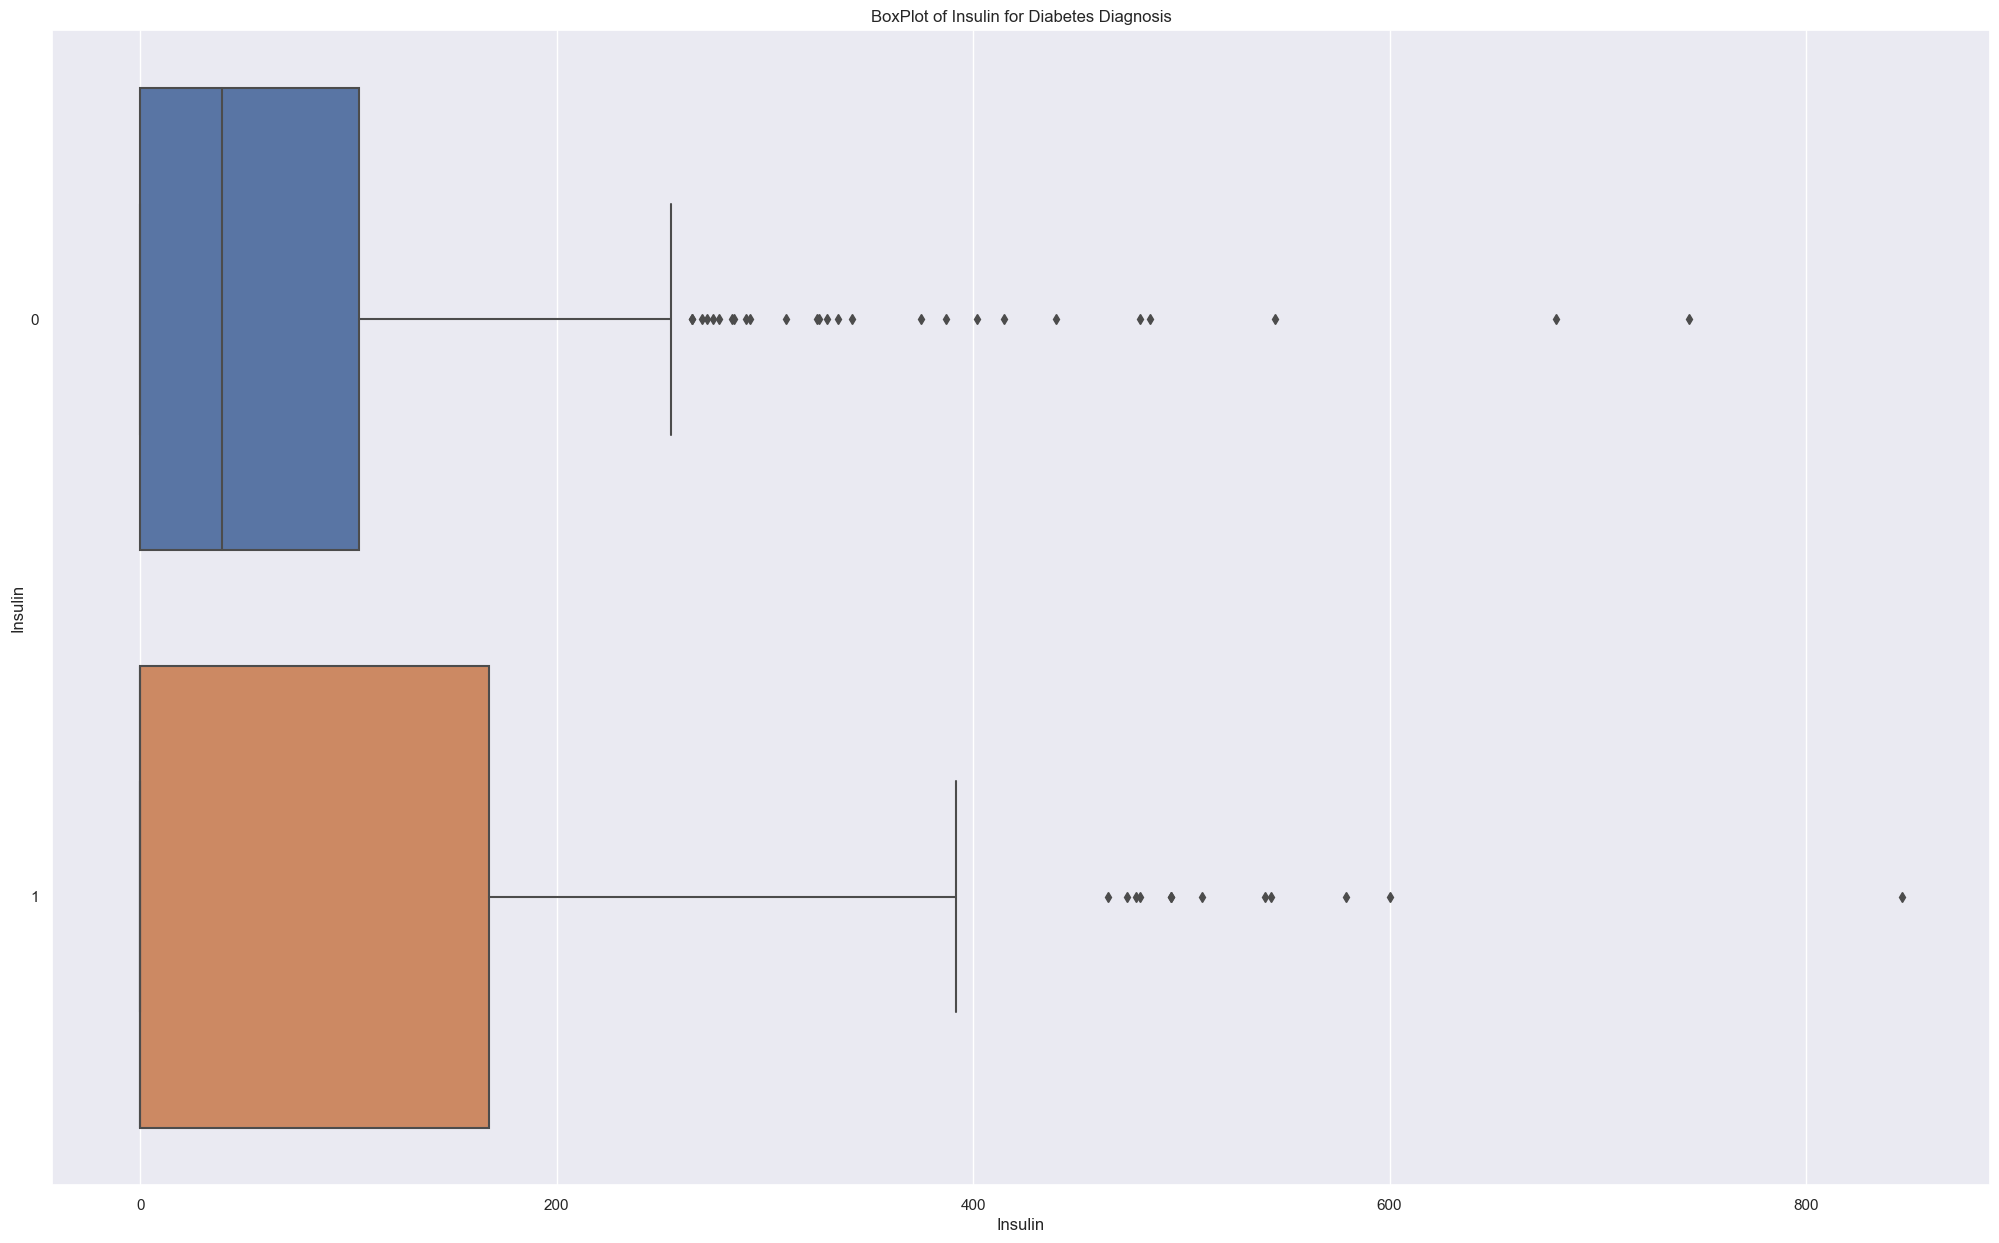

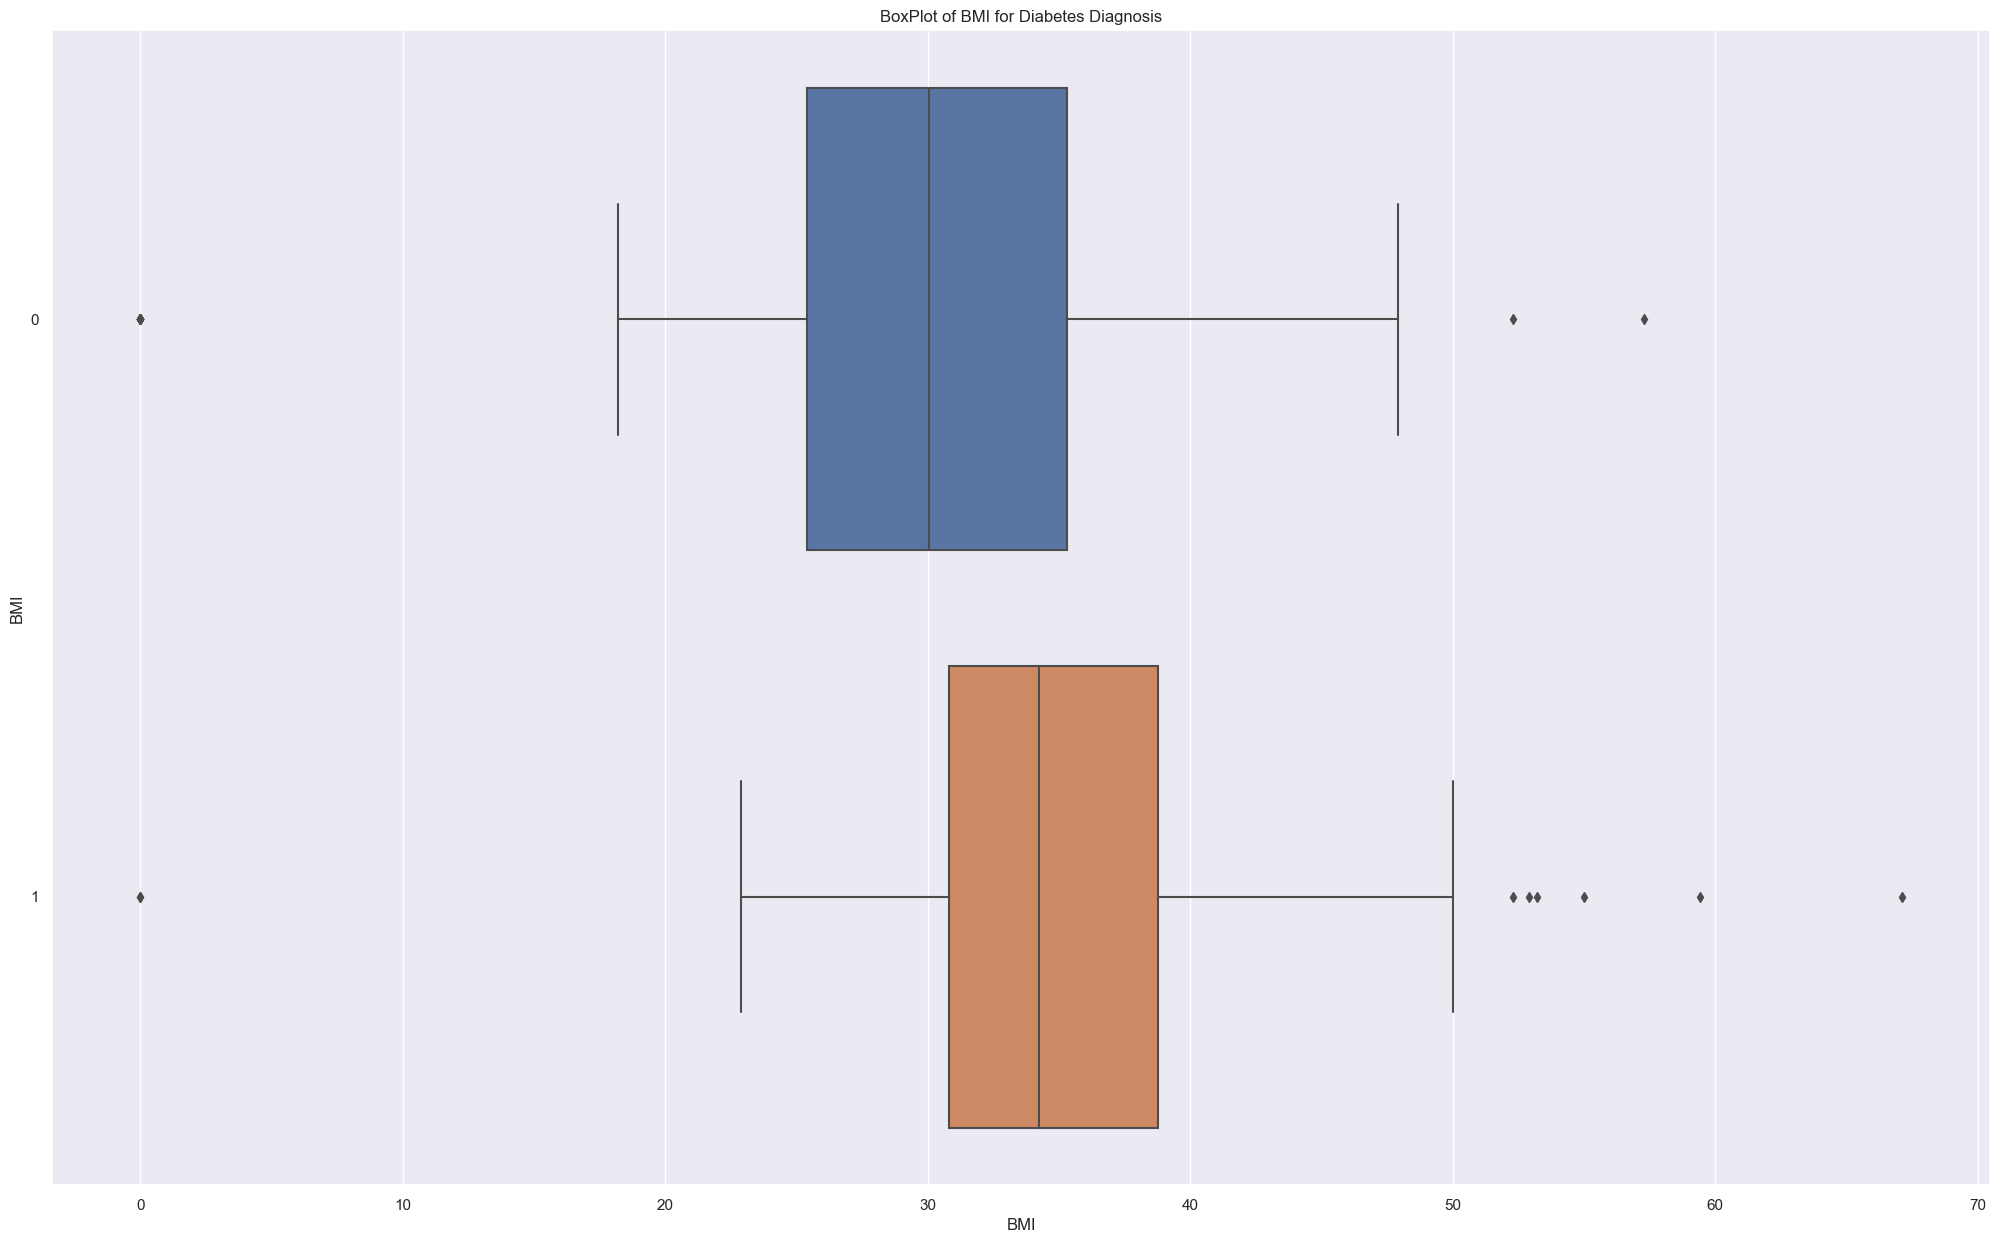

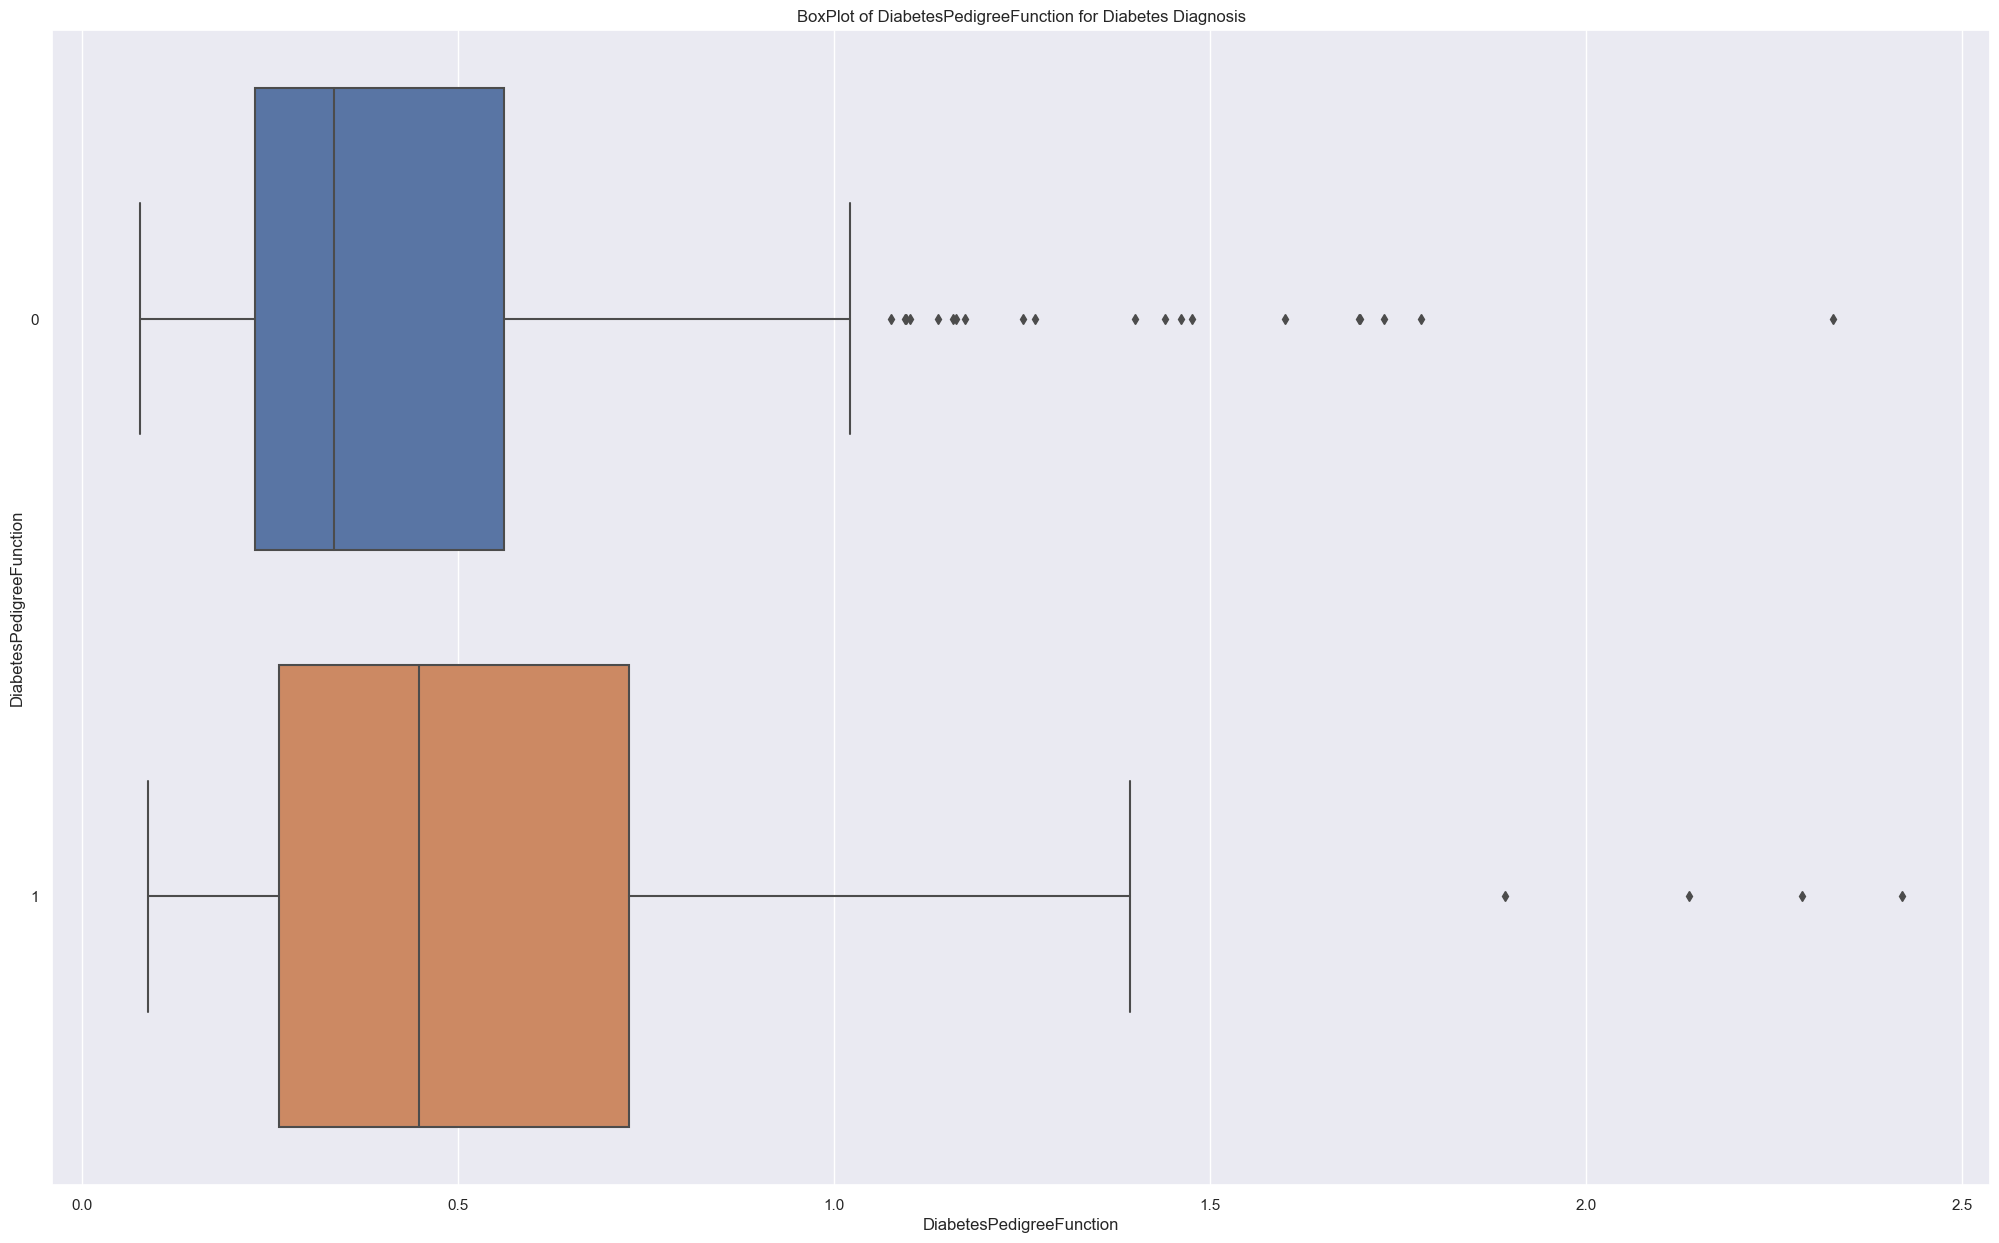

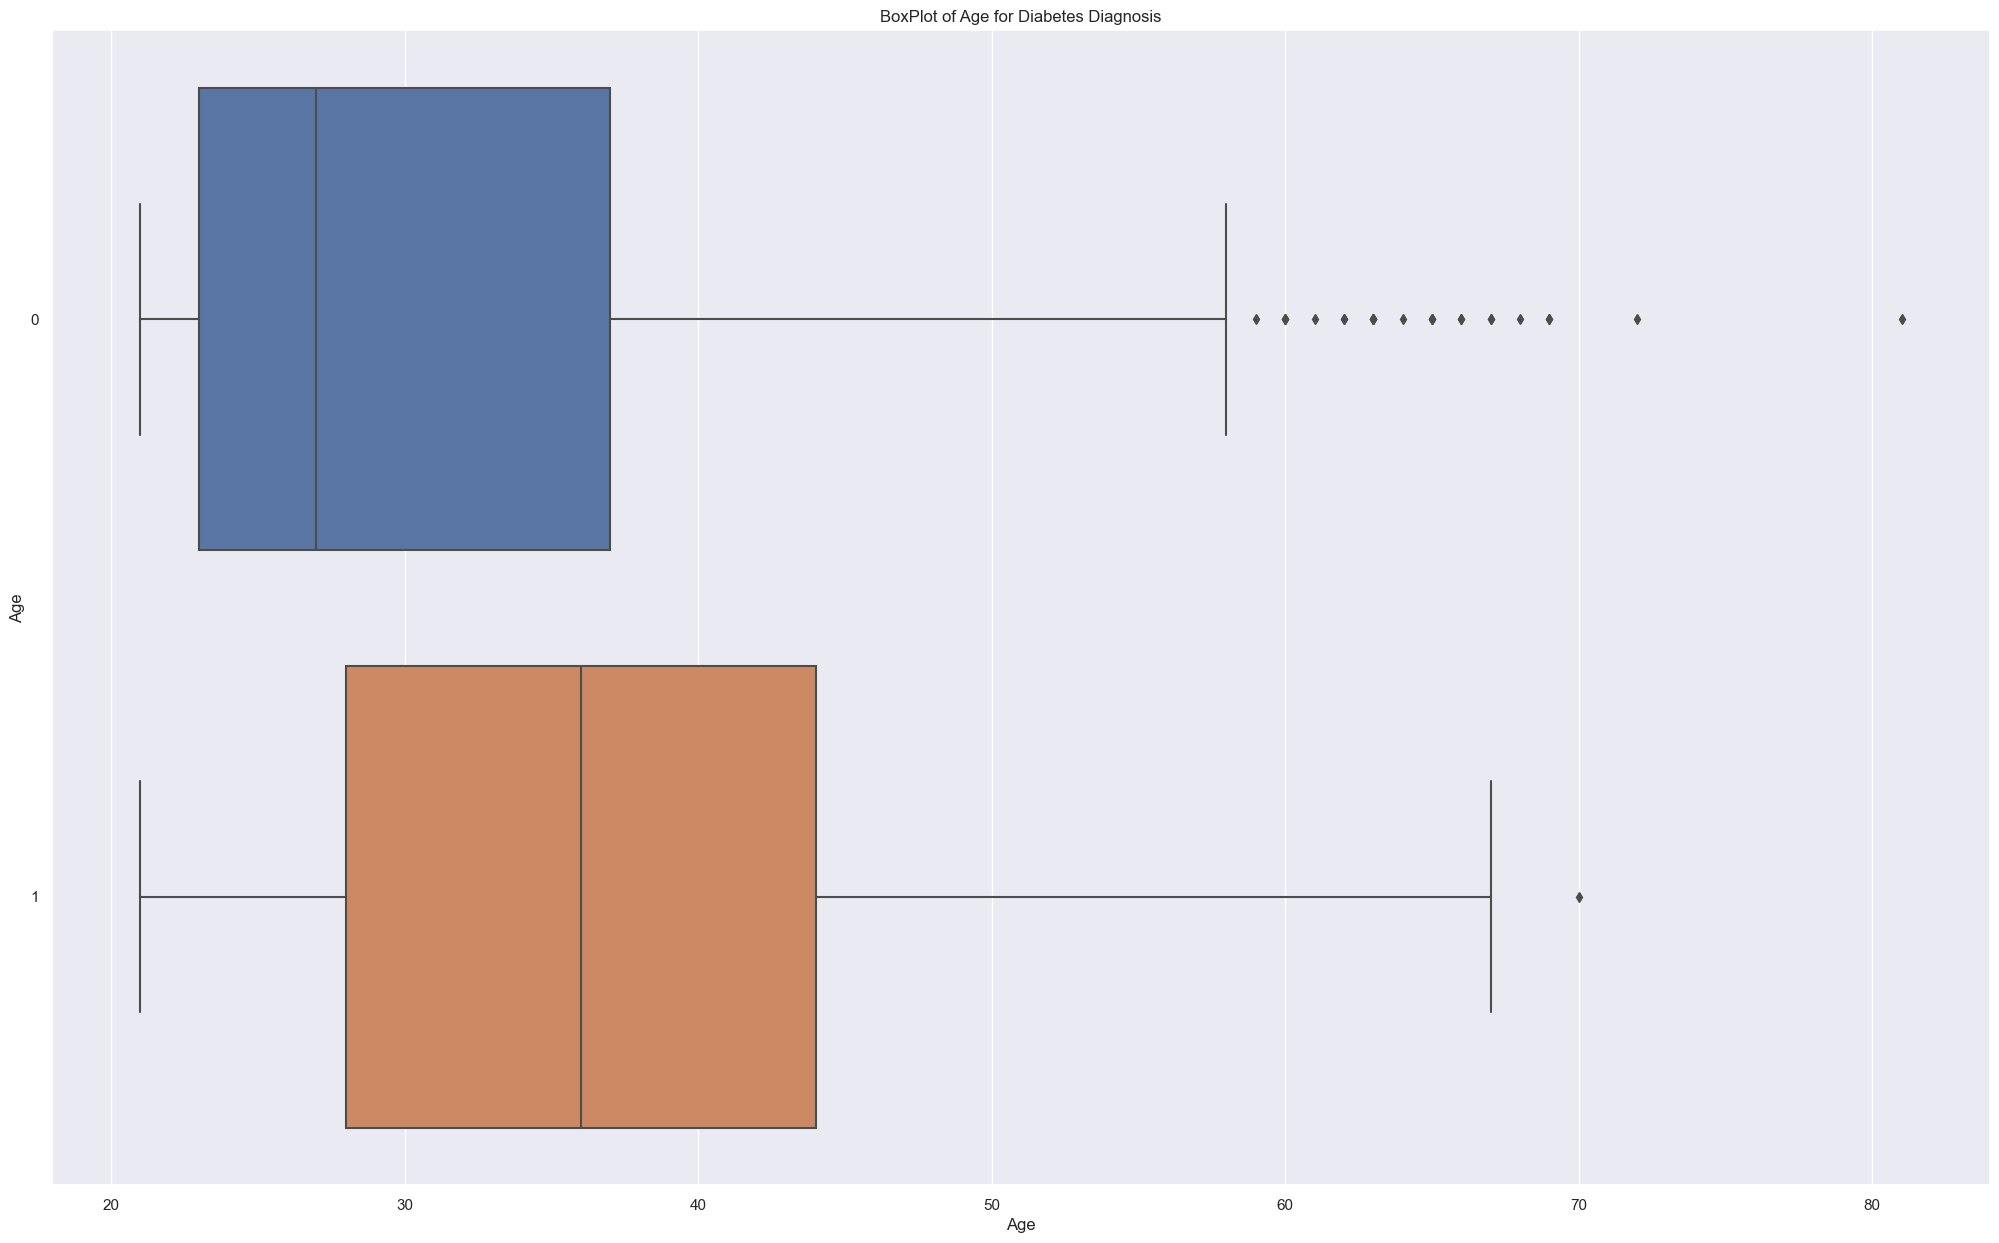

In [89]:
#Relationship of variables
feature_columns = diabetes_data.columns.drop('Outcome')
for column in feature_columns:
    f = plt.figure(figsize=(25, 15))
    sb.boxplot(x=column, y='Outcome', data=diabetes_data, orient="h")
    plt.title(f'BoxPlot of {column} for Diabetes Diagnosis')
    plt.ylabel(f'{column}')
    plt.show()

#### Based on the boxplots shown, we can see that :

- Outcome of '1'has a higher median of Pregnancies.
- For Outcome of '1' ,the median of Glucose is on the higher side compared to Outcome of '0'.
- The median BMI for those with diabetes is higher compared to those with no diabetes.
- The spread of Glucose, Insulin, Age and DiabetesPedigreeFunction have a wider spread, indicating theres is more variability compared to other variables.

Text(0.5, 1.0, 'Insulin Vs Glucose')

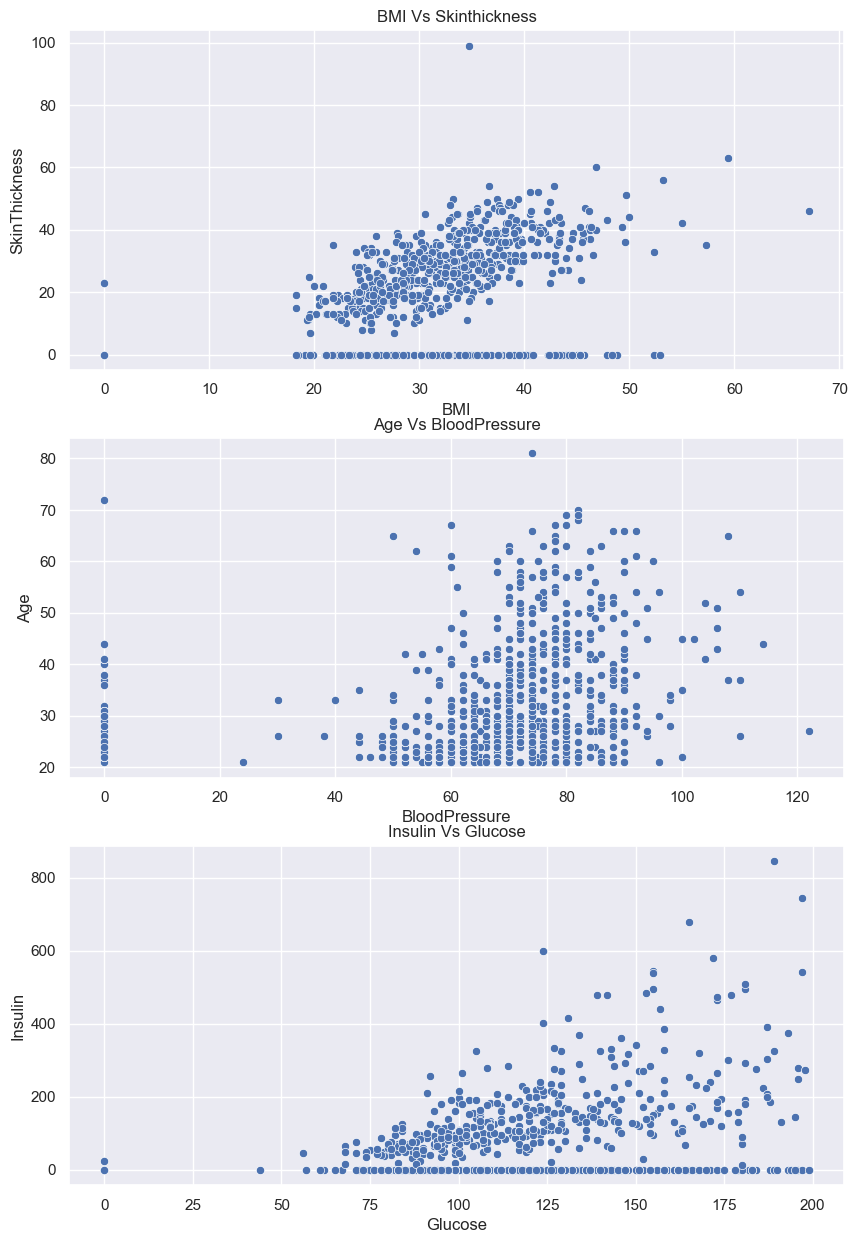

In [24]:
# Lets evaluate some more insights the data relationships
f, axes = plt.subplots(3, 1, figsize=(10, 15))
sb.scatterplot(data=diabetes_data,x="BMI",y="SkinThickness",ax = axes[0])
axes[0].set_title('BMI Vs Skinthickness')
sb.scatterplot(data=diabetes_data,x="BloodPressure",y="Age",ax = axes[1])
axes[1].set_title('Age Vs BloodPressure')
sb.scatterplot(data=diabetes_data,x="Glucose",y="Insulin",ax = axes[2])
axes[2].set_title('Insulin Vs Glucose')

- There is a strong relationship between between two independent variable 'BMI' & 'Skinthickness'. But compare to Skinthickness, BMI has strong relationship with variable 'Outcome'.
- Hence its safe to assume we can drop 'Skinthickness'.

# Cleaning the Data

#### We will proceed with cleaning the data by removing the outliers from 'Insulin','BMI' and 'DiabetesPedigreeFunction'

In [25]:
#Function to determine how many outliers in each of these variables
def Total_Outlier(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lowoutlier=Q1-1.5*IQR
    highoutlier=Q3+1.5*IQR
    totaloutlier=((data[column]<lowoutlier)|(data[column]>highoutlier)).sum()
    print("Total number of Outliers in "+ column + " are : {}".format(totaloutlier))
    
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']

for i in outliers_list:
    Total_Outlier(diabetes_data,i)

Total number of Outliers in Insulin are : 34
Total number of Outliers in BMI are : 19
Total number of Outliers in DiabetesPedigreeFunction are : 29


In [26]:
#After removal of Outliers
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']
def Outlier_Removal(data,column):
    clean_data = data[(data[column]<highoutlier)&(data[column]>lowoutlier)]
    totaloutlier = ((clean_data[column] < lowoutlier) | (clean_data[column] > highoutlier)).sum()
    print("Total number of Outliers in "+ column + " are : {}".format(totaloutlier))
    return clean_data

for i in outliers_list:
    lowoutlier = diabetes_data[i].quantile(0.25) - 1.5 * (diabetes_data[i].quantile(0.75) - diabetes_data[i].quantile(0.25))
    highoutlier = diabetes_data[i].quantile(0.75) + 1.5 * (diabetes_data[i].quantile(0.75) - diabetes_data[i].quantile(0.25))
    clean_data = Outlier_Removal(diabetes_data,i)

Total number of Outliers in Insulin are : 0
Total number of Outliers in BMI are : 0
Total number of Outliers in DiabetesPedigreeFunction are : 0


In [27]:
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Histoplot for cleaned data

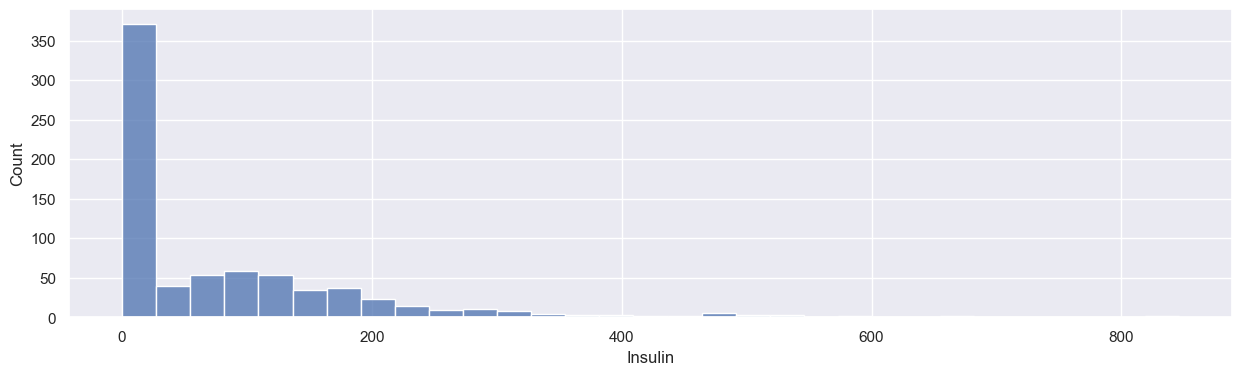

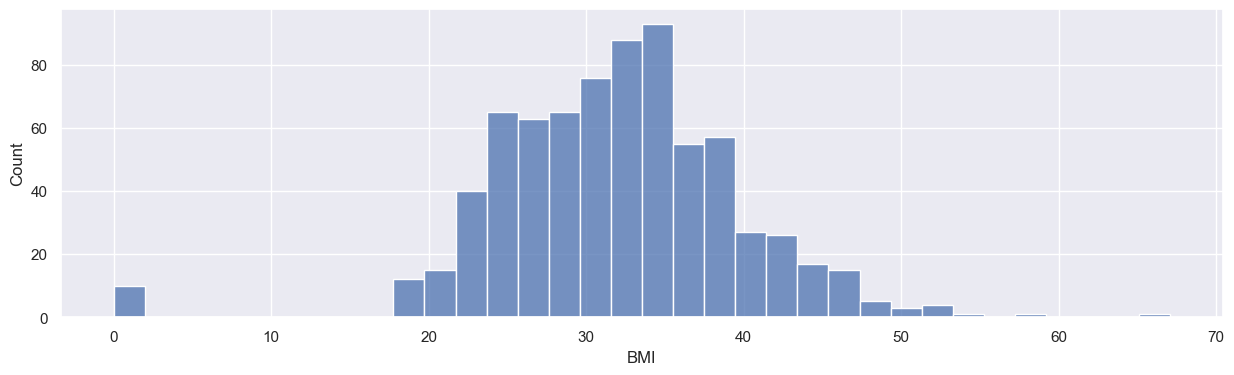

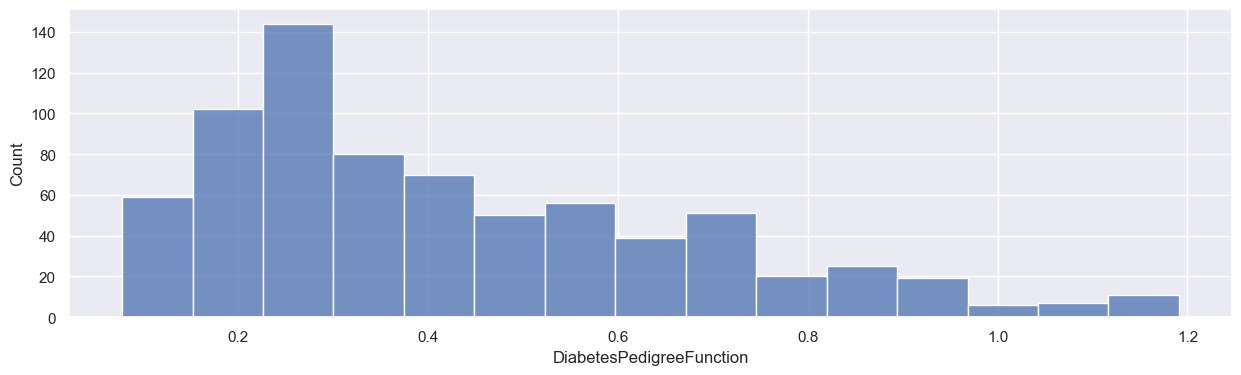

In [28]:
outliers_list = ['Insulin','BMI','DiabetesPedigreeFunction']
def Univariate_boxplot (data,column):
    plt.figure(figsize=(15, 4))
    sb.histplot(data = data,x = column)

for columns in outliers_list :
    Univariate_boxplot (clean_data,columns)
    plt.show()

# Binary Classification

We will be using all variables to help predict whether a patient had diabetes
Here, we would like to show how relevant each variable is to 'Outcome' using the stripplot.

Text(0.5, 1.0, 'Outcome by Glucose')

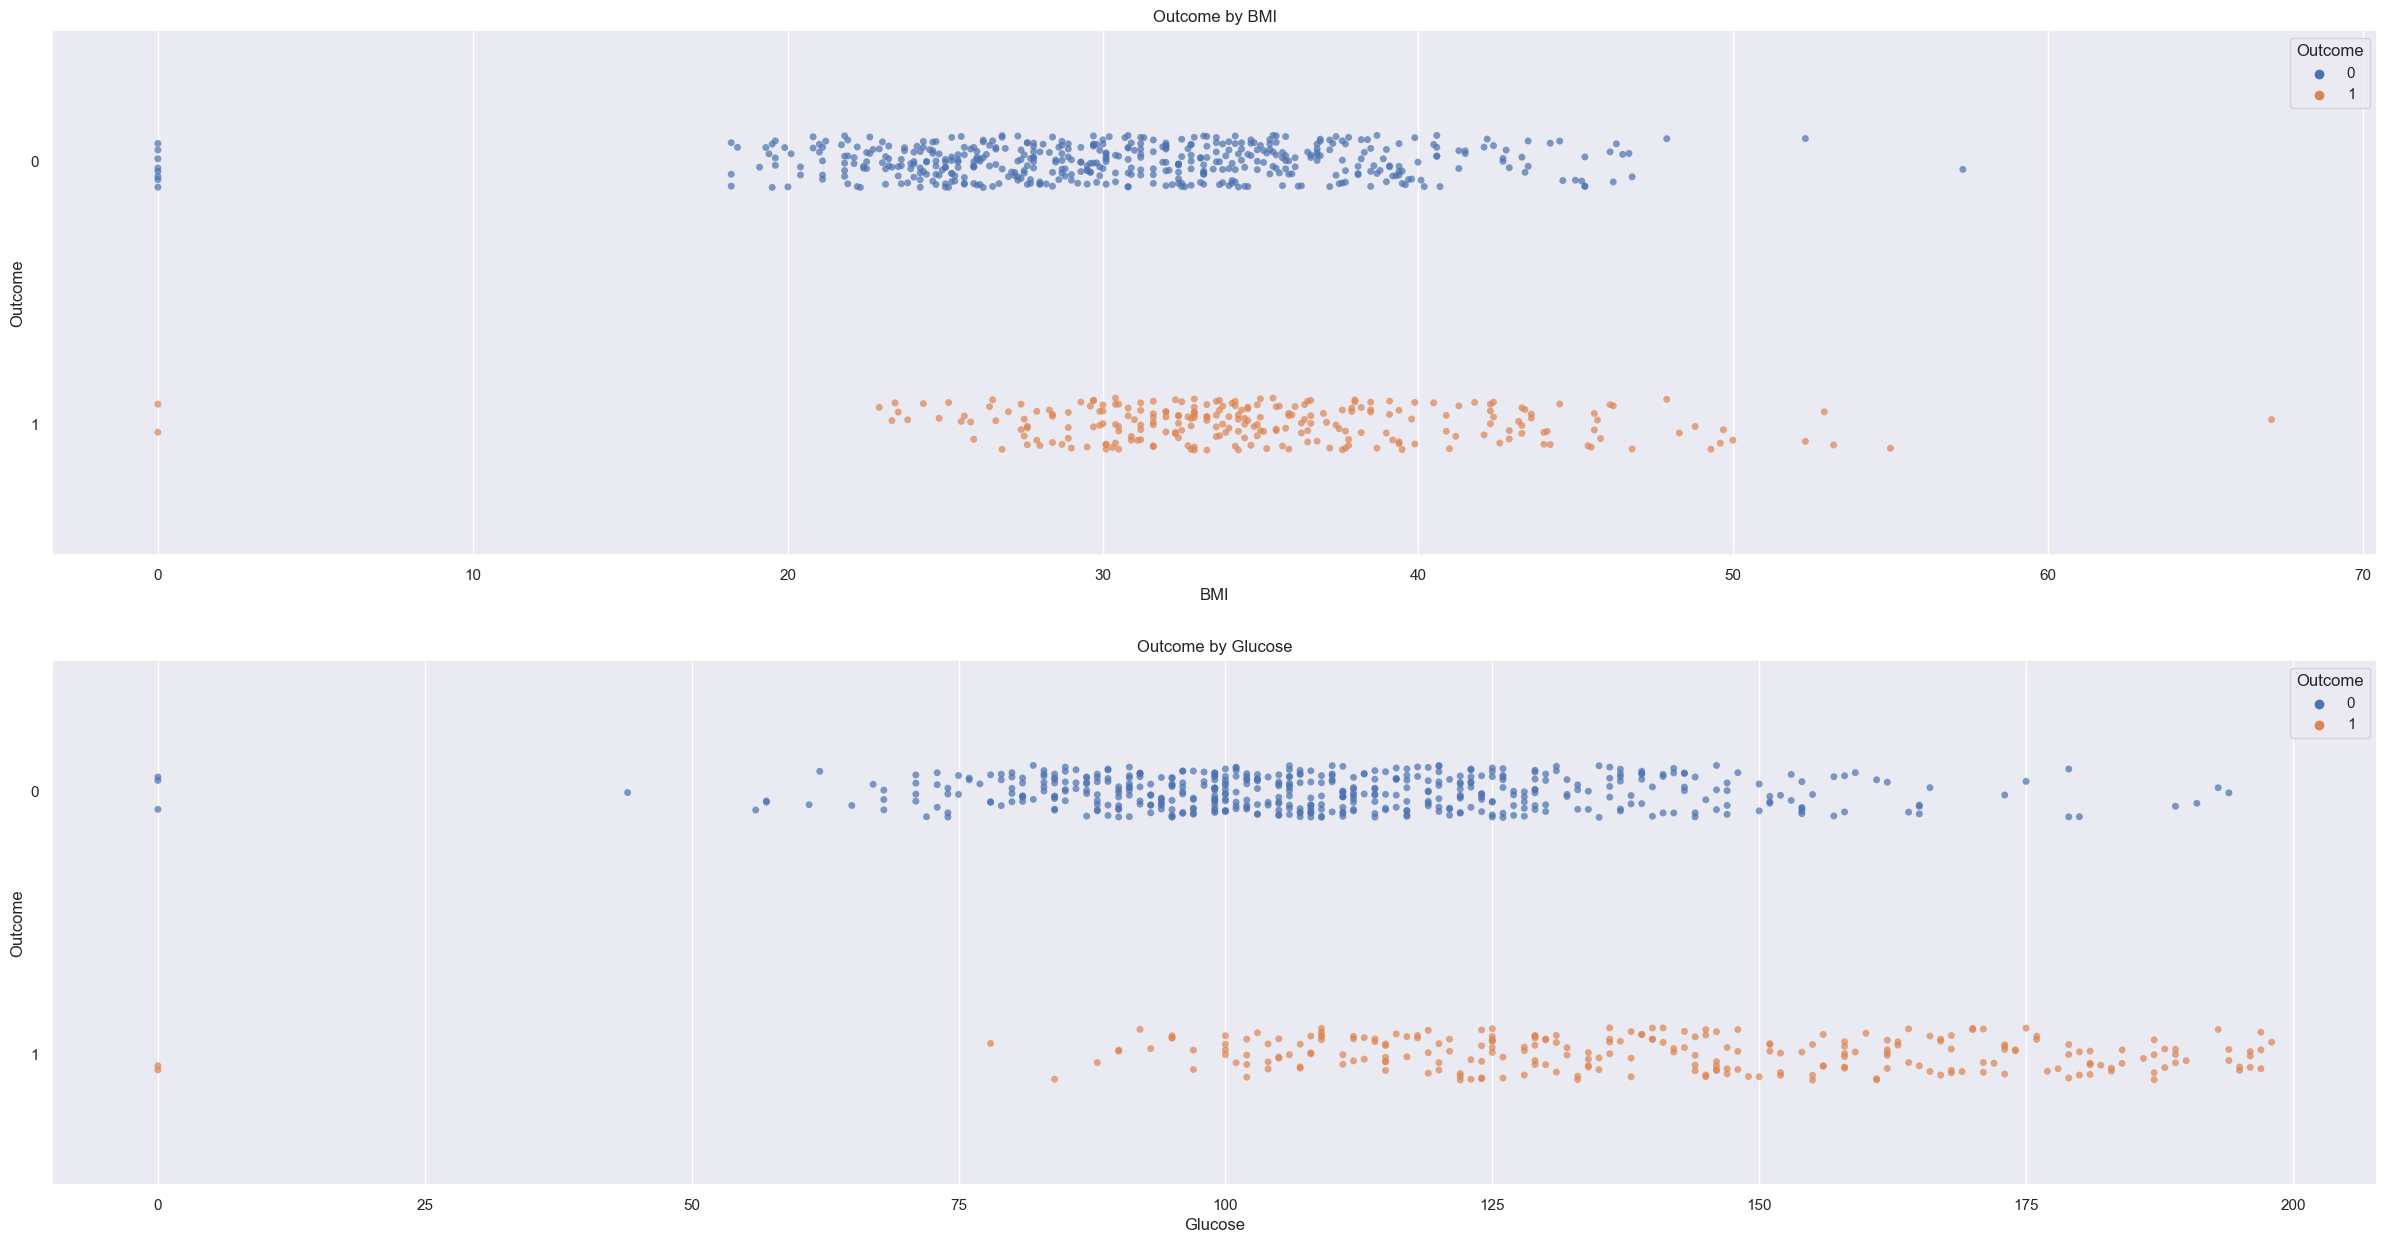

In [113]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='BMI', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome,',alpha=0.7)
axes[0].set_title('Outcome by BMI')

sb.stripplot(x='Glucose', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by Glucose')

Text(0.5, 1.0, 'Outcome by Insulin')

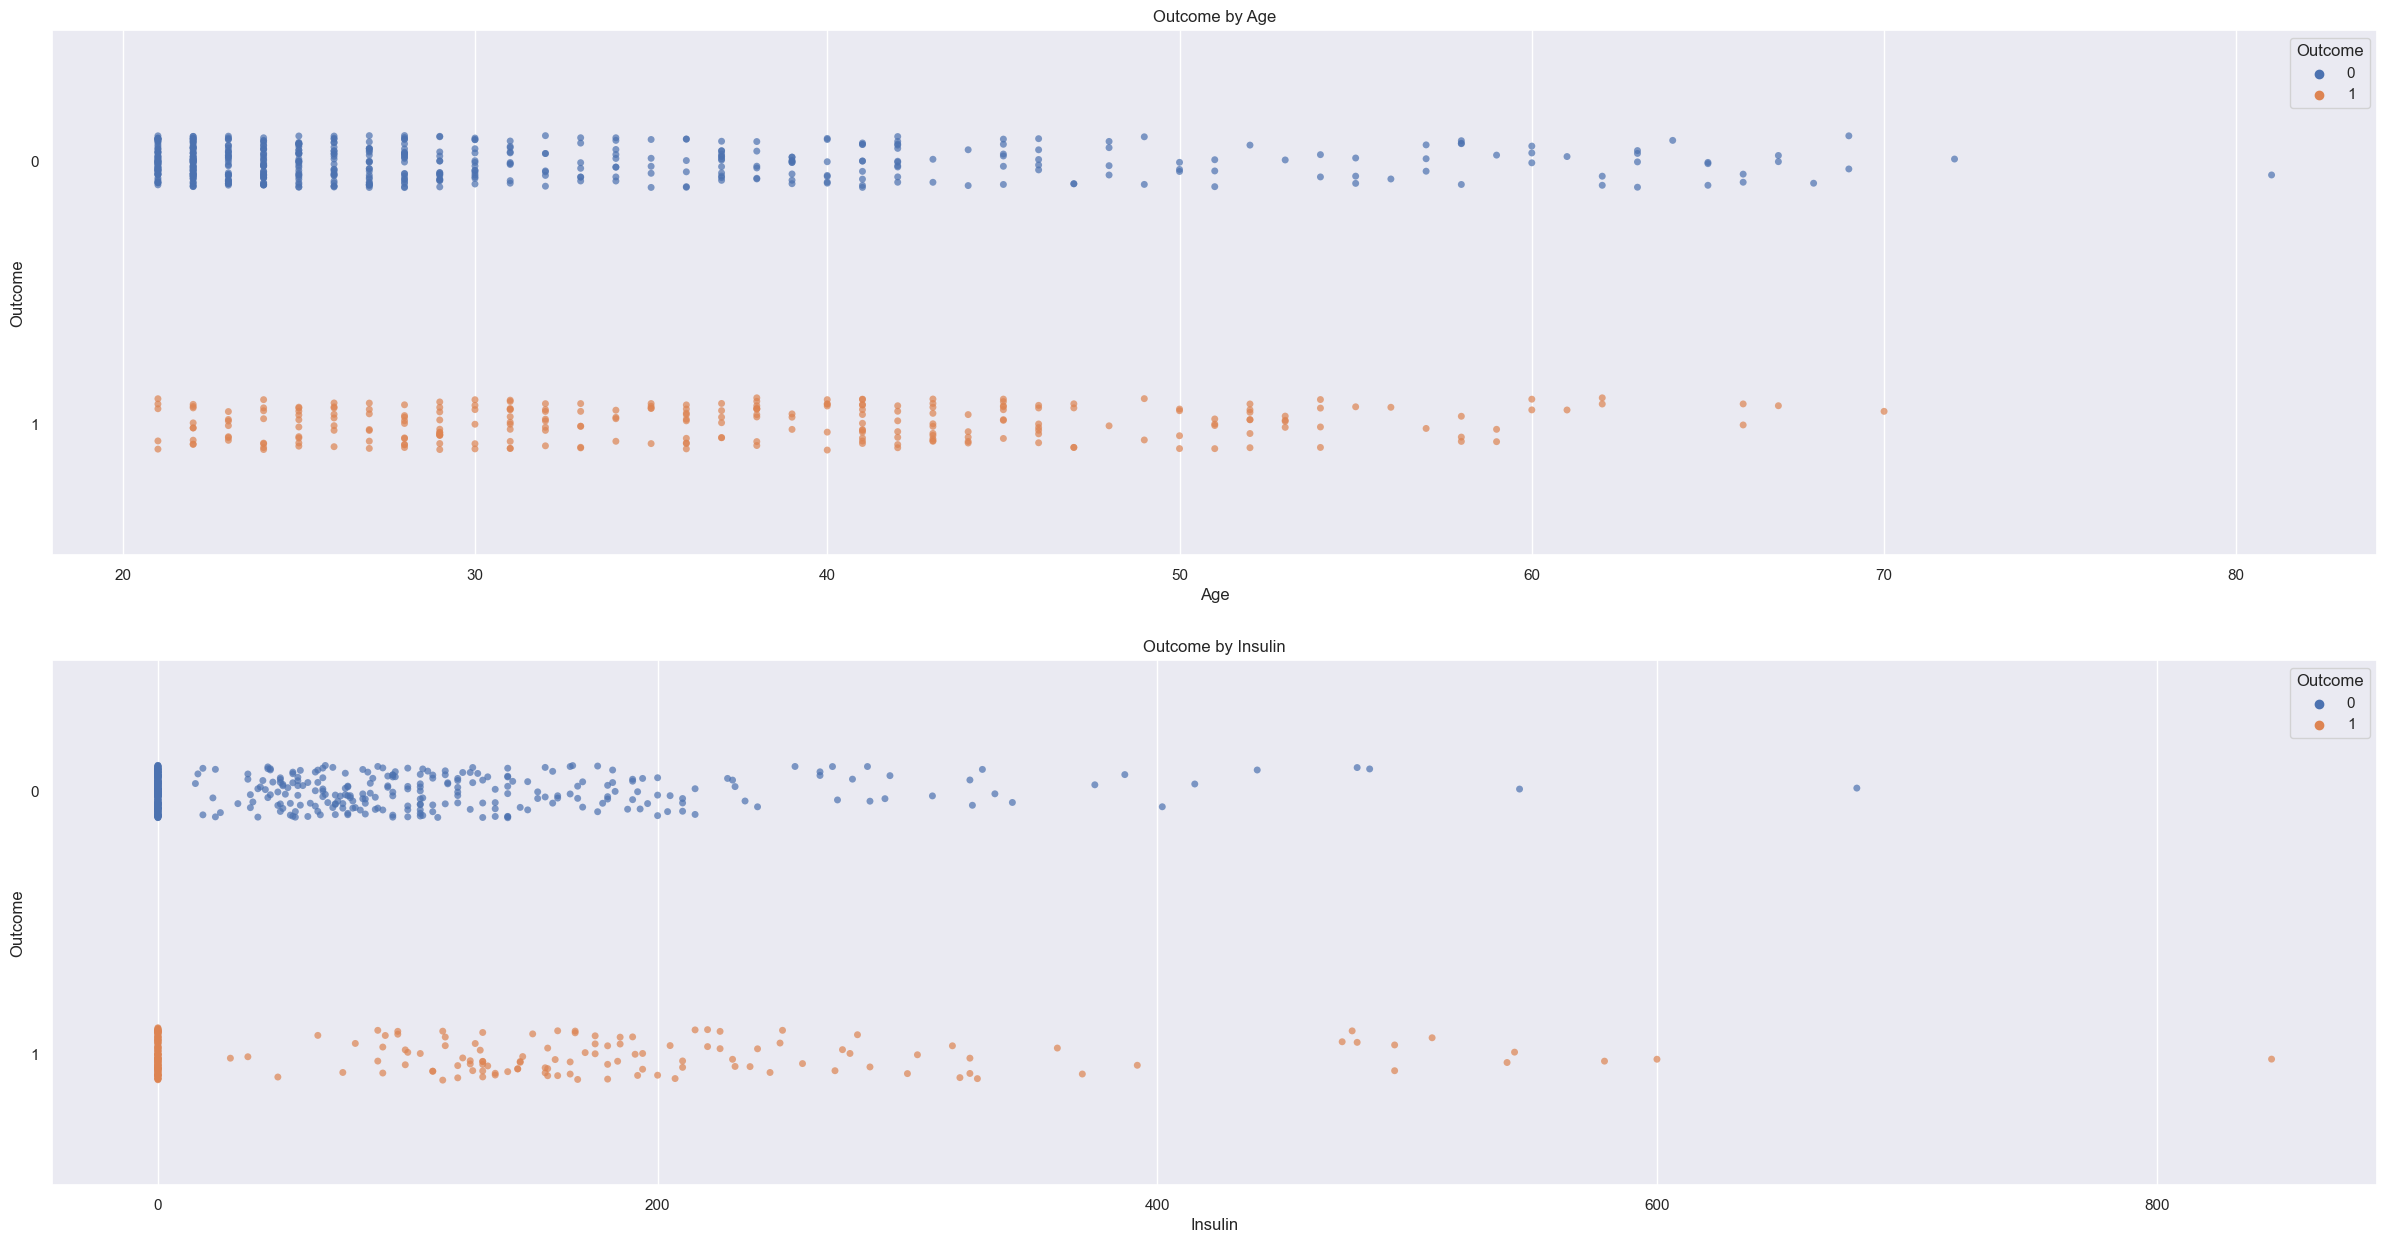

In [116]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='Age', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by Age')

sb.stripplot(x='Insulin', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by Insulin')


Text(0.5, 1.0, 'Outcome by BloodPressure')

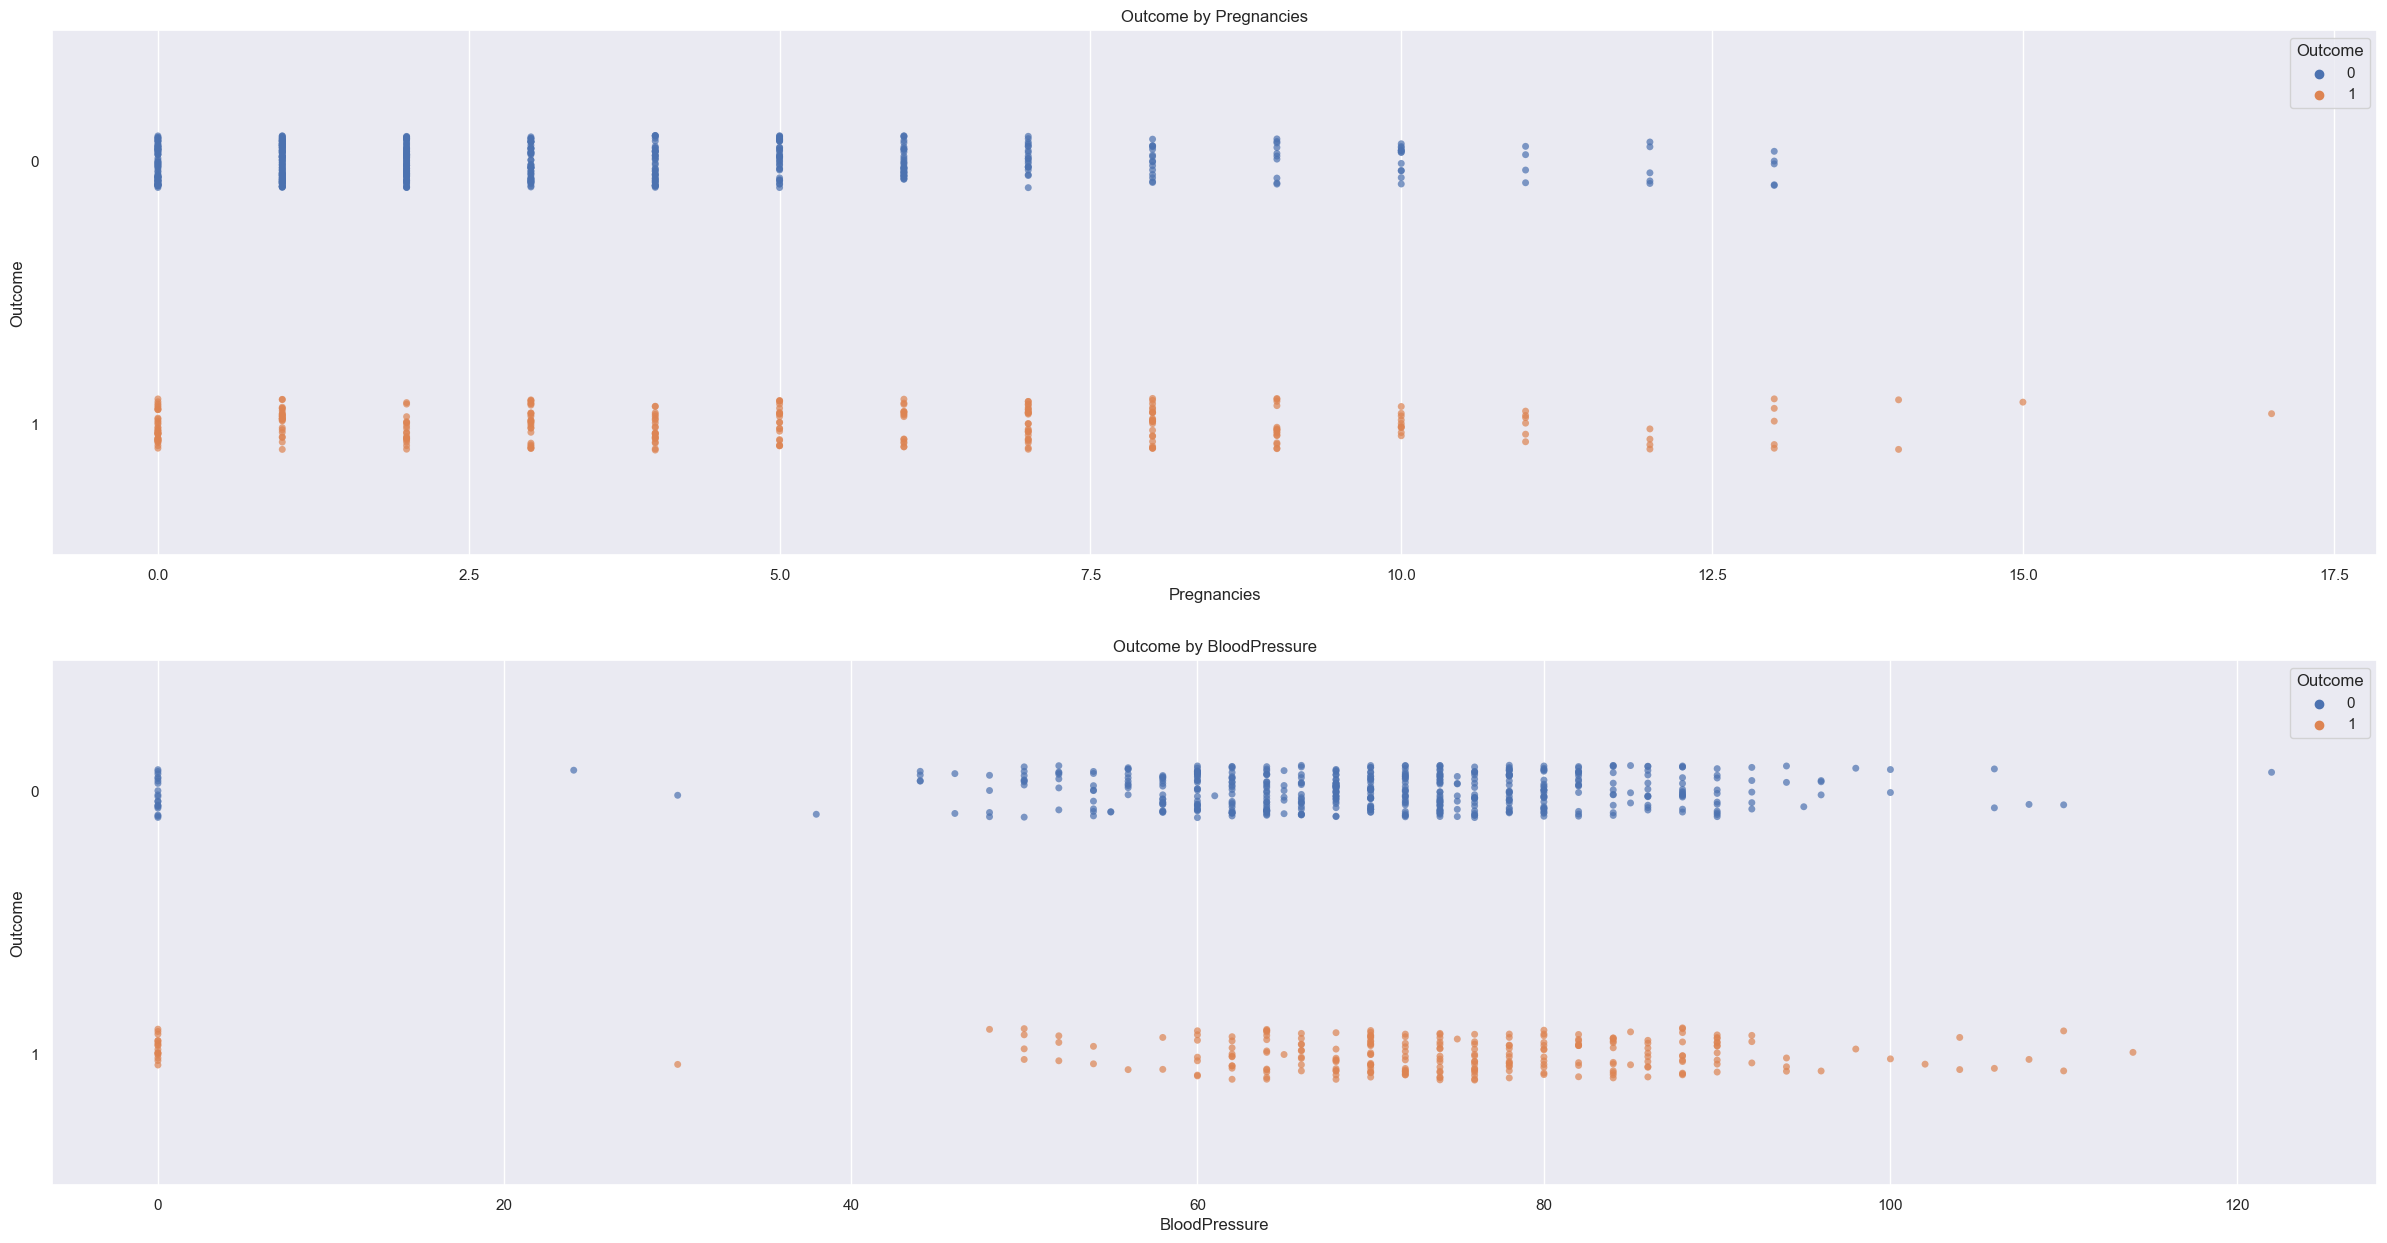

In [114]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='Pregnancies', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by Pregnancies')

sb.stripplot(x='BloodPressure', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by BloodPressure')

Text(0.5, 1.0, 'Outcome by DiabetesPedigreeFunction')

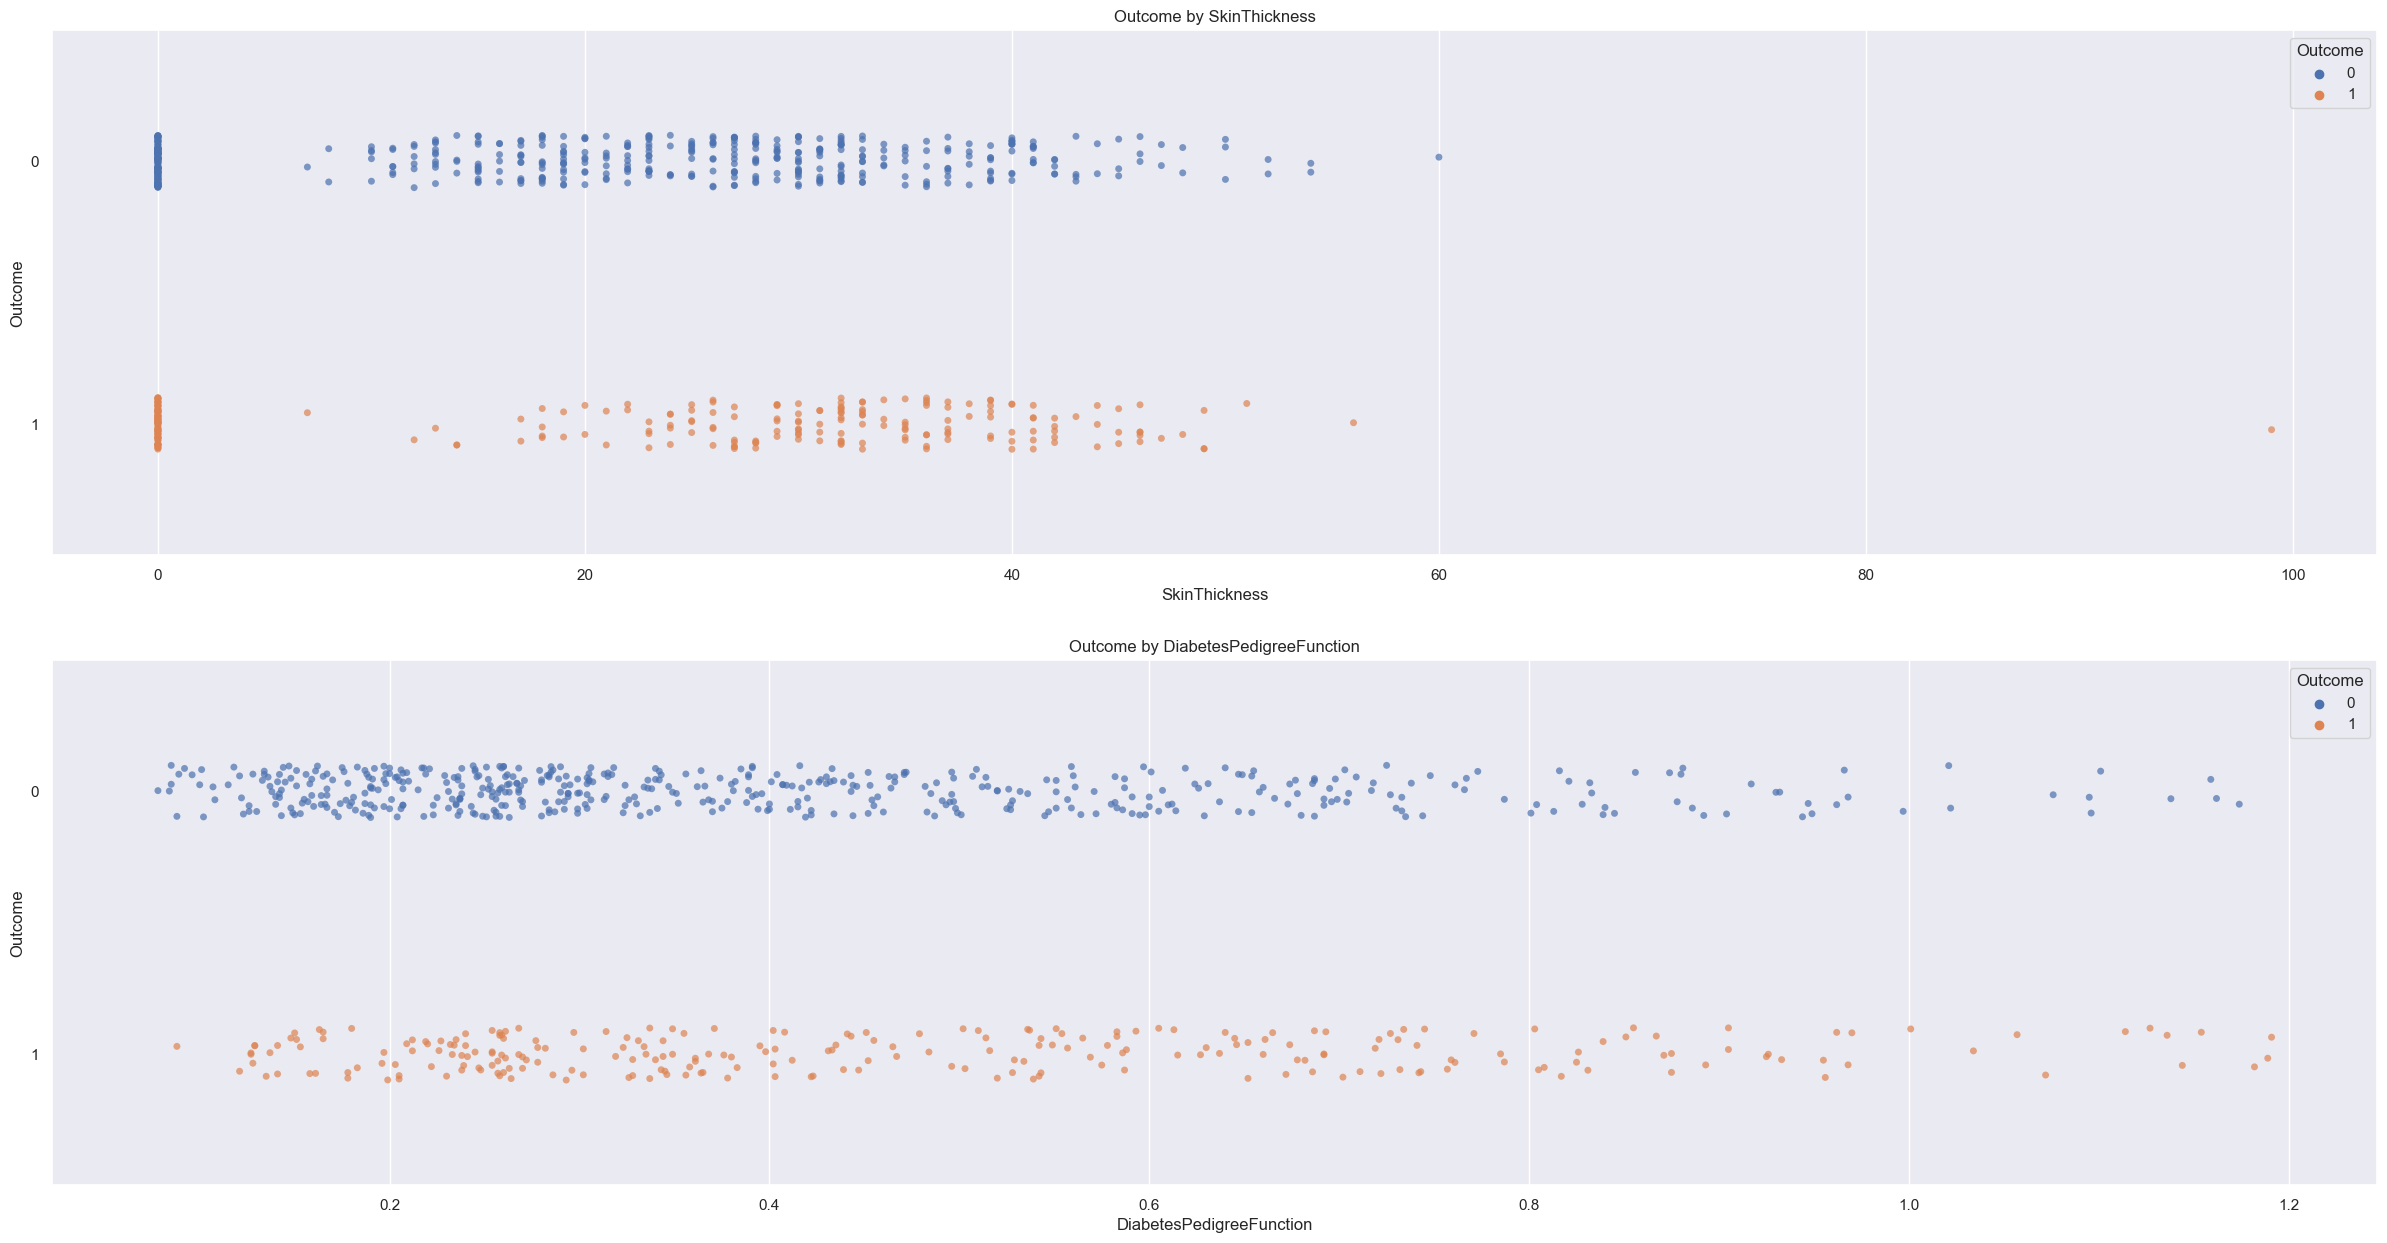

In [115]:
f, axes = plt.subplots(2, 1, figsize=(30, 15))

sb.stripplot(x='SkinThickness', y='Outcome', data=clean_data, orient="h", ax=axes[0], hue ='Outcome',alpha=0.7)
axes[0].set_title('Outcome by SkinThickness')

sb.stripplot(x='DiabetesPedigreeFunction', y='Outcome', data=clean_data, orient="h", ax=axes[1], hue = 'Outcome',alpha=0.7)
axes[1].set_title('Outcome by DiabetesPedigreeFunction')

### It can be seen through the strip plots that :
- BMI, Glucose, Insulin and BloodPressure may have a slightly more obvious relation between them and Outcome compared to the other variables.

## Decision Tree

### Since variable Glucose has the highest correlation coefficient to Outcome from previously, lets try using this variable to predict

In [145]:
#Extracting Data
result = pd.DataFrame(clean_data['Outcome'])  # Response
glucose = pd.DataFrame(clean_data['Glucose']) # Predictor

# Split the Dataset into Train and Test (randomly)
X_train, X_test, y_train, y_test = train_test_split(glucose, result, test_size = 0.35)

# Sample sizes
print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 1) (480, 1)
Test set : (259, 1) (259, 1)


In [149]:
#Making the decision tree
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5340909090909091, 0.9, 'Glucose <= 130.5\ngini = 0.439\nsamples = 480\nvalue = [324, 156]\nclass = N'),
 Text(0.25, 0.7, 'Glucose <= 101.5\ngini = 0.31\nsamples = 329\nvalue = [266, 63]\nclass = N'),
 Text(0.09090909090909091, 0.5, 'Glucose <= 28.5\ngini = 0.128\nsamples = 145\nvalue = [135, 10]\nclass = N'),
 Text(0.045454545454545456, 0.3, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = N'),
 Text(0.13636363636363635, 0.3, 'Glucose <= 96.5\ngini = 0.107\nsamples = 141\nvalue = [133, 8]\nclass = N'),
 Text(0.09090909090909091, 0.1, 'gini = 0.073\nsamples = 106\nvalue = [102, 4]\nclass = N'),
 Text(0.18181818181818182, 0.1, 'gini = 0.202\nsamples = 35\nvalue = [31, 4]\nclass = N'),
 Text(0.4090909090909091, 0.5, 'Glucose <= 123.5\ngini = 0.41\nsamples = 184\nvalue = [131, 53]\nclass = N'),
 Text(0.3181818181818182, 0.3, 'Glucose <= 104.5\ngini = 0.394\nsamples = 141\nvalue = [103, 38]\nclass = N'),
 Text(0.2727272727272727, 0.1, 'gini = 0.457\nsamples = 17\nvalue = [11, 6]\nc

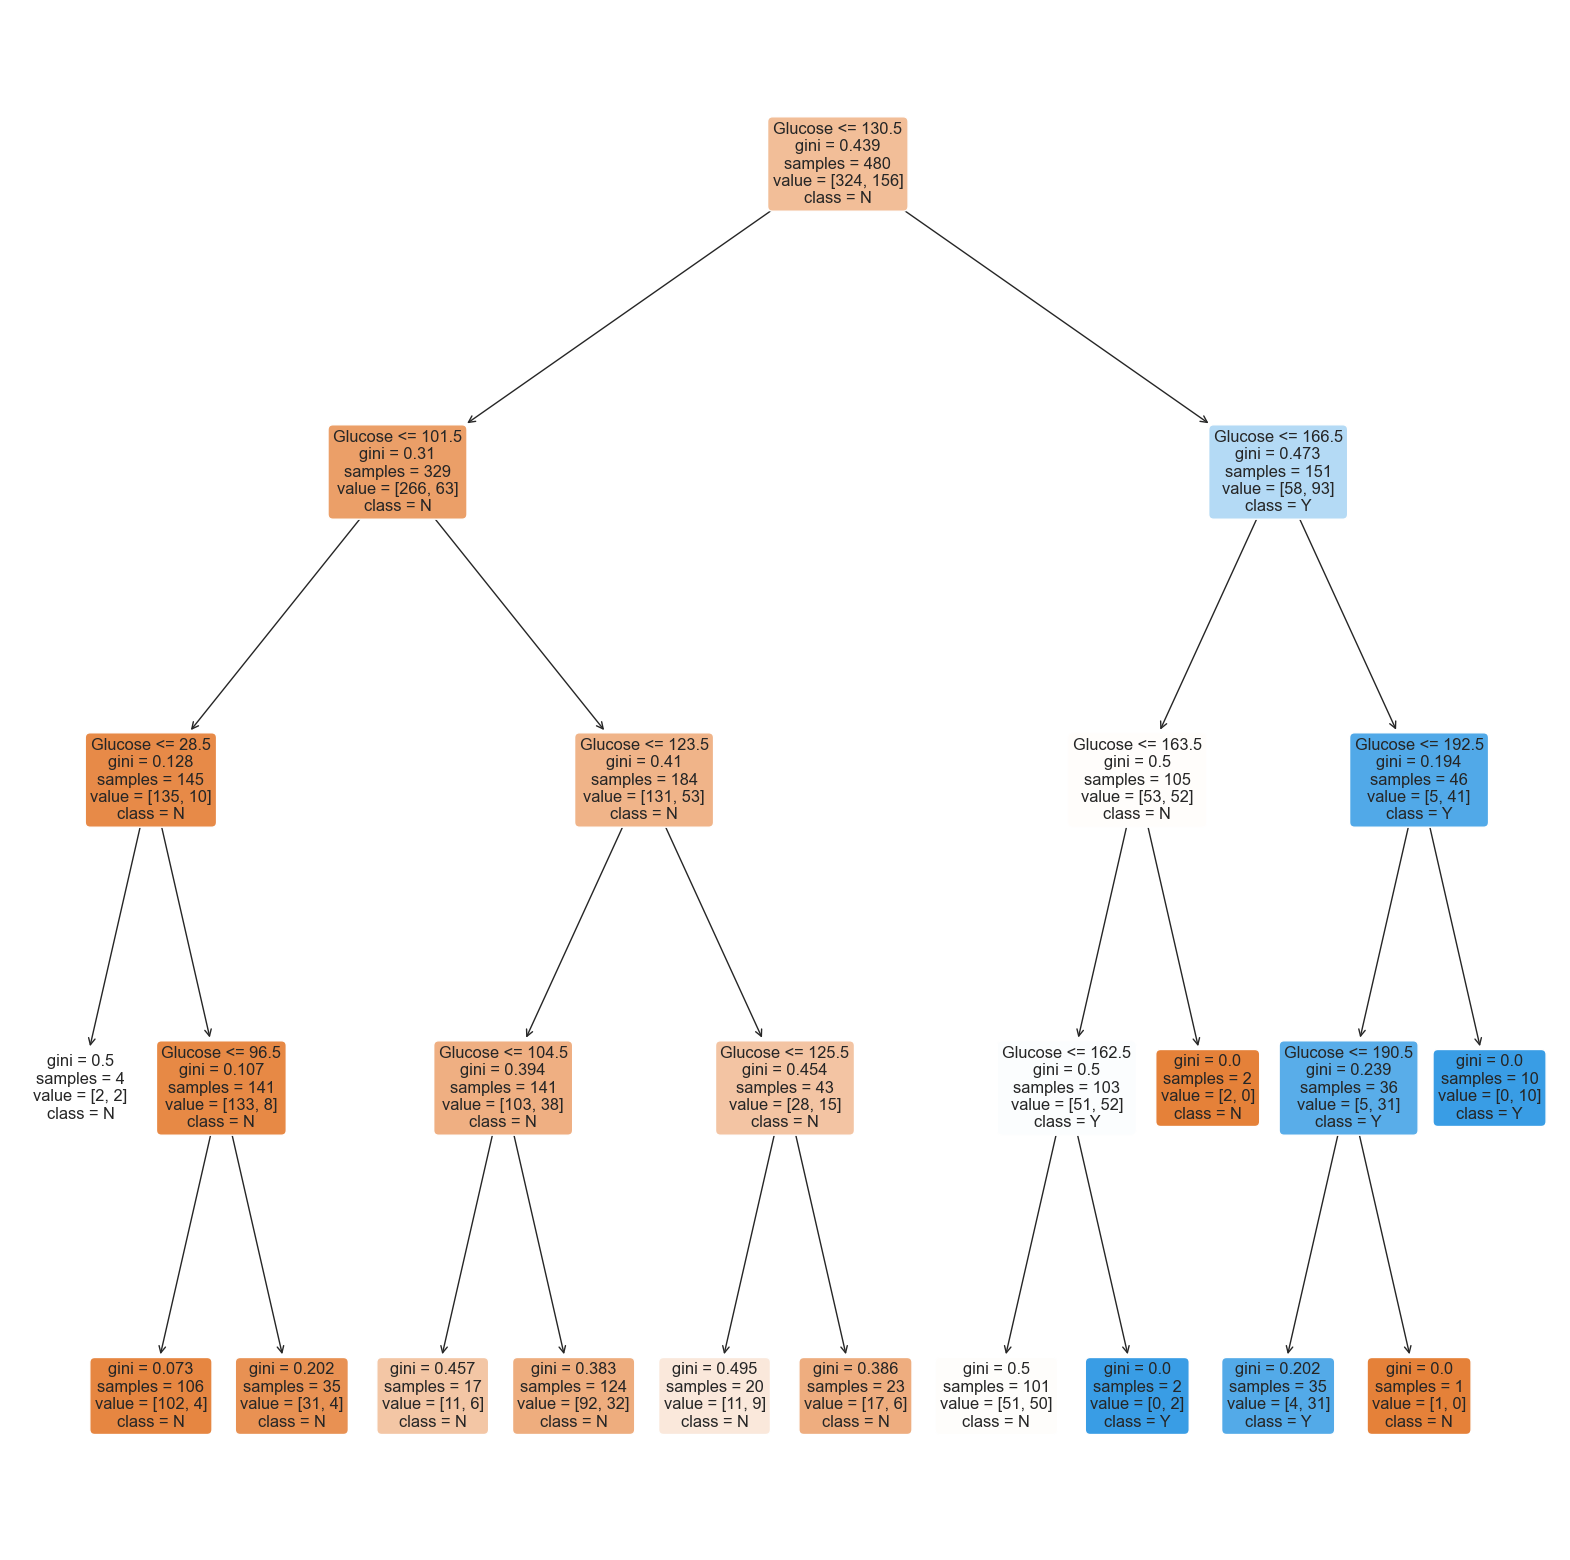

In [150]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Glucose"], 
          class_names=["N","Y"])

#### Goodness of Fit test

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.75625

True Negative: 320.0
False Positive: 4.0
False Negative: 113.0
True Positive: 43.0

True Positive Rate :  0.2756
False Positive Rate :  0.0123

True Negative Rate :  0.9877
False Negative Rate :  0.7244

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6988416988416989

True Negative: 160.0
False Positive: 4.0
False Negative: 74.0
True Positive: 21.0

True Positive Rate :  0.2211
False Positive Rate :  0.0244

True Negative Rate :  0.9756
False Negative Rate :  0.7789


Text(0.5, 11.249999999999995, 'Predicted')

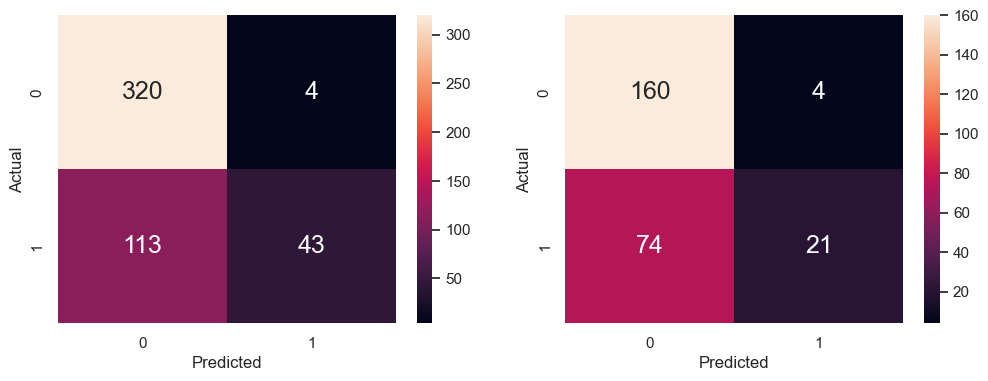

In [151]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

### By using only a single variable it can be seen that the rate for False Negatives is quite high, hence rendering the prediction model very inaccurate. Lets see what happens if we were to use all other variables instead of just a single one.

In [206]:
#Extracting Data
y=clean_data['Outcome'] # Response
x=clean_data.drop('Outcome',axis=1) # Predictor

# Split the Dataset into Train and Test (randomly)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

# Sample sizes
print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 8) (480,)
Test set : (259, 8) (259,)


In [207]:
#Making the decision tree
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.45535714285714285, 0.9, 'Glucose <= 130.5\ngini = 0.457\nsamples = 480\nvalue = [310, 170]\nclass = N'),
 Text(0.19642857142857142, 0.7, 'Pregnancies <= 6.5\ngini = 0.333\nsamples = 318\nvalue = [251, 67]\nclass = N'),
 Text(0.10714285714285714, 0.5, 'BMI <= 45.4\ngini = 0.258\nsamples = 263\nvalue = [223, 40]\nclass = N'),
 Text(0.07142857142857142, 0.3, 'BMI <= 30.95\ngini = 0.23\nsamples = 257\nvalue = [223, 34]\nclass = N'),
 Text(0.03571428571428571, 0.1, 'gini = 0.086\nsamples = 133\nvalue = [127, 6]\nclass = N'),
 Text(0.10714285714285714, 0.1, 'gini = 0.35\nsamples = 124\nvalue = [96, 28]\nclass = N'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Y'),
 Text(0.2857142857142857, 0.5, 'Glucose <= 96.0\ngini = 0.5\nsamples = 55\nvalue = [28, 27]\nclass = N'),
 Text(0.21428571428571427, 0.3, 'DiabetesPedigreeFunction <= 0.781\ngini = 0.278\nsamples = 18\nvalue = [15, 3]\nclass = N'),
 Text(0.17857142857142858, 0.1, 'gini = 0.117\nsamples 

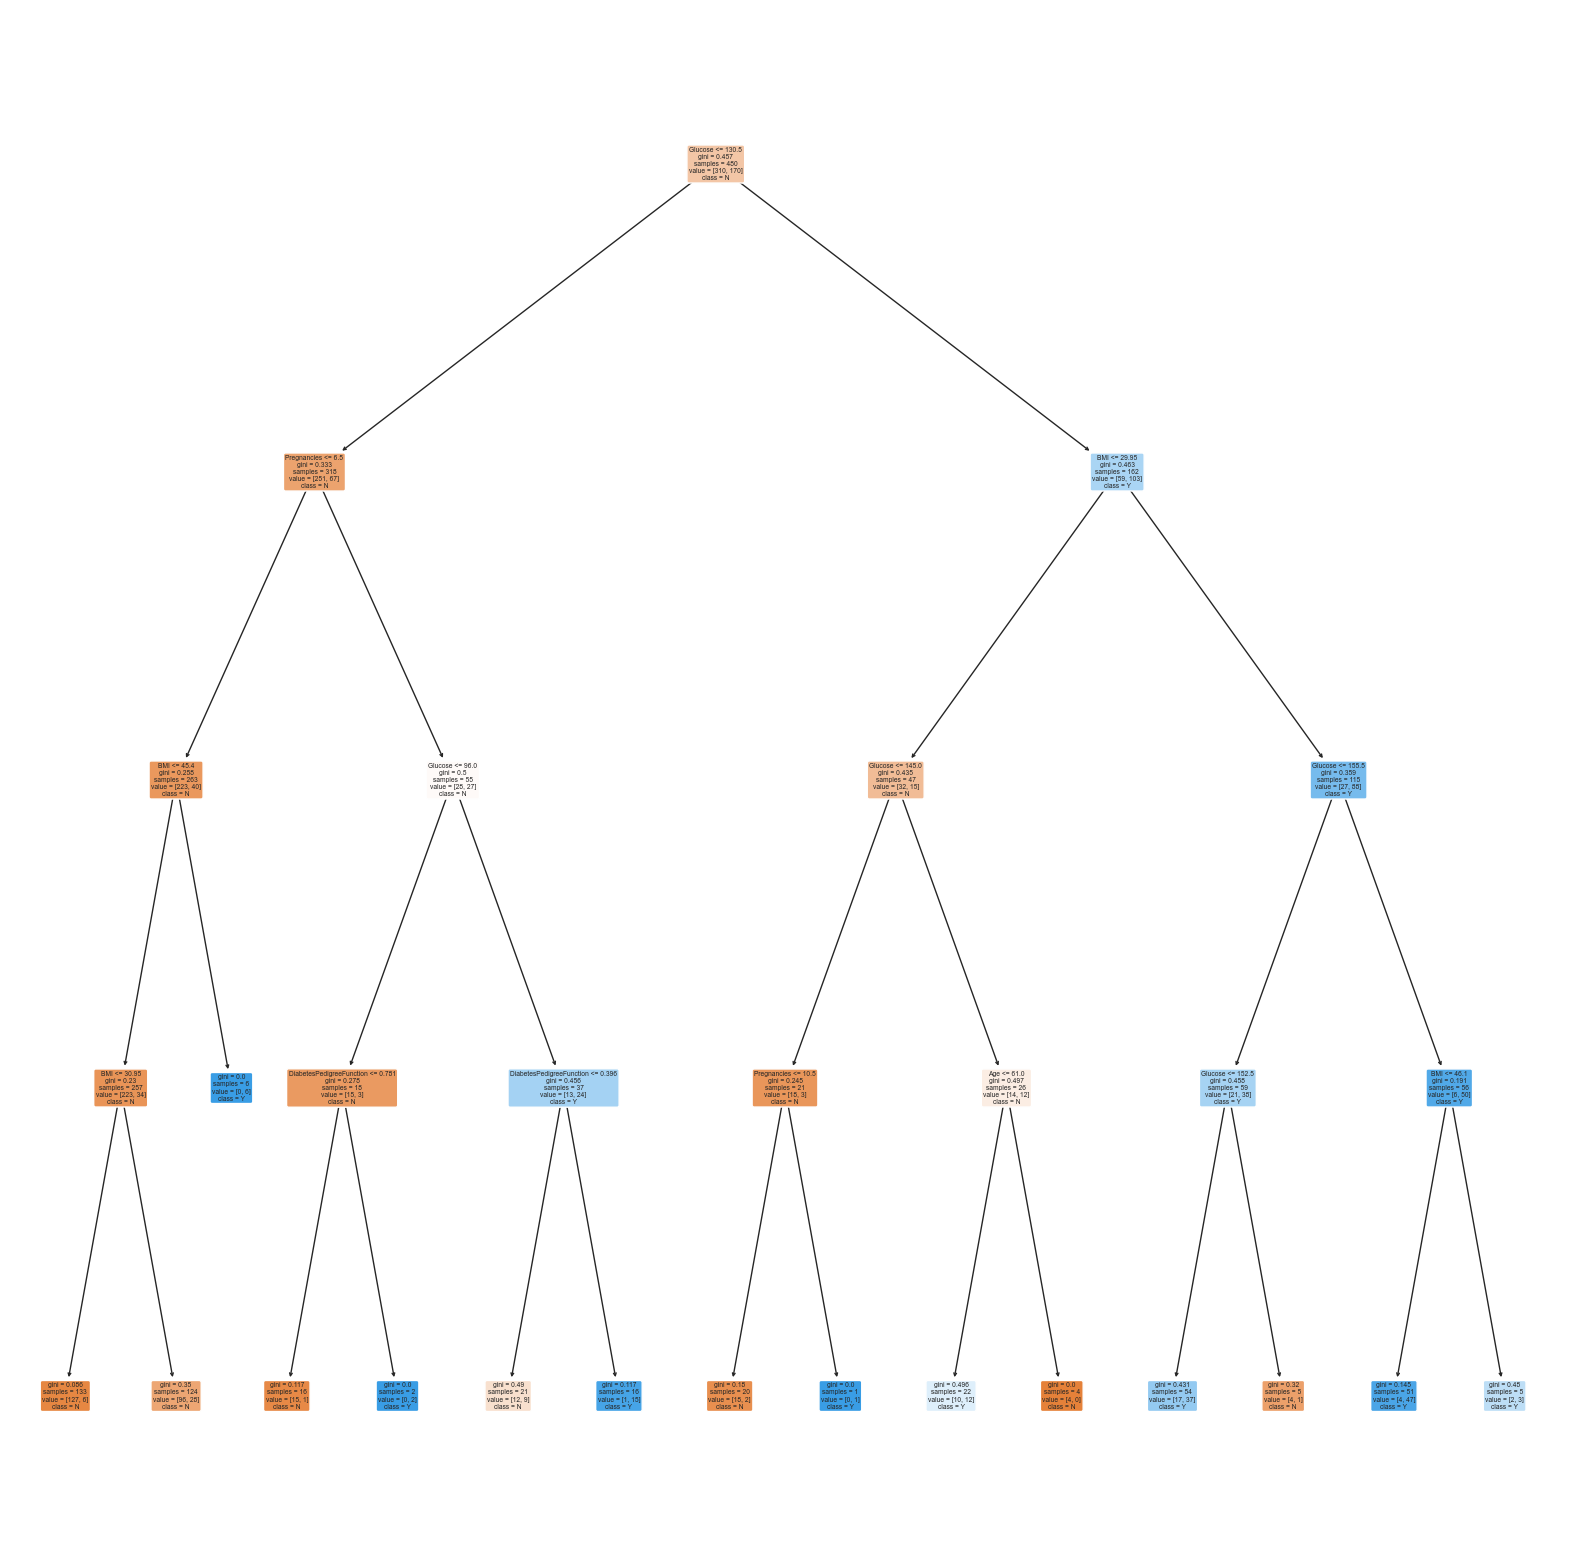

In [208]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["N","Y"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.83125

True Negative: 276.0
False Positive: 34.0
False Negative: 47.0
True Positive: 123.0

True Positive Rate :  0.7235
False Positive Rate :  0.1097

True Negative Rate :  0.8903
False Negative Rate :  0.2765

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7644787644787645

True Negative: 148.0
False Positive: 30.0
False Negative: 31.0
True Positive: 50.0

True Positive Rate :  0.6173
False Positive Rate :  0.1685

True Negative Rate :  0.8315
False Negative Rate :  0.3827


Text(0.5, 11.249999999999995, 'Predicted')

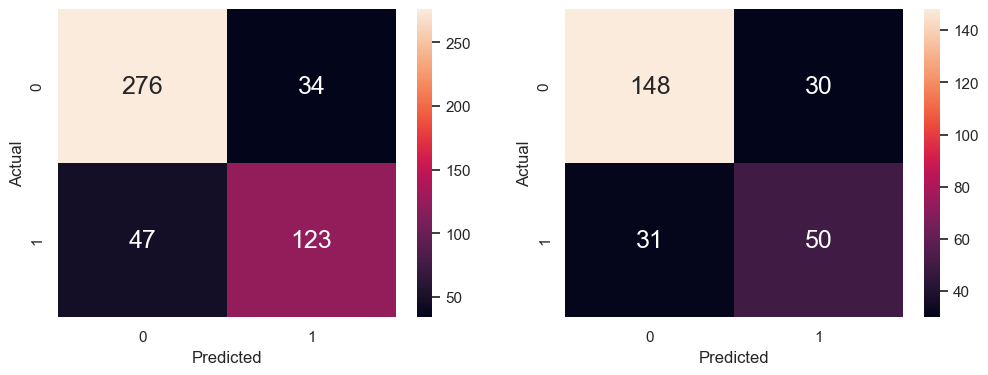

In [209]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

#### Next we would like to use the ROC curve as the ROC (Receiver Operating Characteristic) Curve which displays the percentage of true positives predicted by the model.It can take values from 0 to 1. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5.

Hence, the higher the AUC (area under the curve), the more accurately our model is able to predict outcomes:

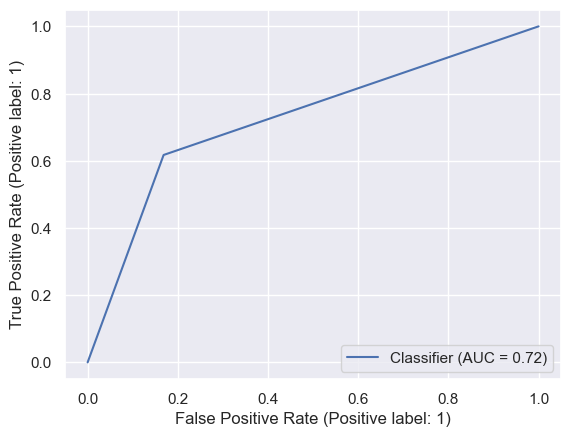

In [210]:
# ROC curve & AUC
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

- The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data.
- AUC is 0.72, that means 72% of the classifier’s predictions are correct across all classification thresholds.

#### Confusion matrix vs ROC curve
A confusion matrix can be used to measure the performance of a particular classifier with a fixed threshold. Given a set of input cases, the classifier scores each one, and score above the threshold are labelled Class 1 and scores below the threshold are labelled Class 2.

The ROC curve, on the other hand, examines the performance of a classifier without fixing the threshold. Given a set of input cases, the classifier scores each one. The ROC curve is then generated by testing every possible threshold and plotting each result as a point on the curve.

### Analysis
We have seen before that the database has a much larger proportion of negetive 'Outcome' than positive 'Outcome', the classifier may be biased towards the majority class (negetive) and thus the accuracy metric in this context may not be meaningful. But still, we would believe that variables BMI, Glucose, Insulin and BloodPressure may have contributed more compared to the other variables. Nevertheless, it is important for all of the variables to come together in order for the prediction variable 'Outcome' rather than just a single variable.



## Multivariate Logistic Regression

#### Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes which is true/false.
But for this case, we would like to introduce to multivariate Logistic Regression as it is  a formula used to predict the relationships between various dependent and independent variables. It calculates the probability of something happening depending on multiple sets of variables. This is a common classification algorithm used in data science and machine learning.

In [216]:
from sklearn.linear_model import LogisticRegression
y=clean_data['Outcome']
x=clean_data.drop('Outcome',axis=1)

#New split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (480, 8) (480,)
Test set : (259, 8) (259,)


In [217]:
#Traning the Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Text(0.5, 11.249999999999995, 'Predicted')

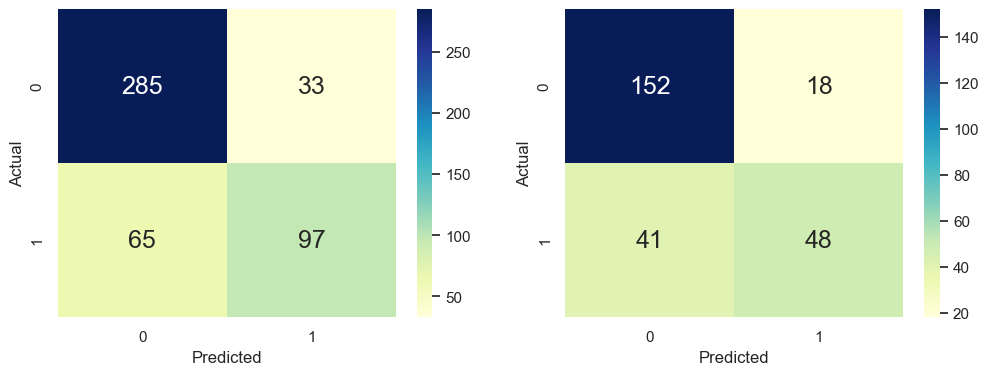

In [218]:
# Save the prediction
y_train_pred1=logistic_model.predict(X_train)
y_test_pred1=logistic_model.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="YlGnBu", ax = axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18},cmap="YlGnBu", ax = axes[1])
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

#### Goodness of Fit test


In [219]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logistic_model.score(X_train, y_train))
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred1).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logistic_model.score(X_test, y_test))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred1).ravel()

print("True Negative:", float(tn))
print("False Positive:", float(fp))
print("False Negative:", float(fn))
print("True Positive:", float(tp))
print()

tpr = tp/(tp + fn)
fpr = fp/(tn + fp)
tnr = tn/(tn + fp)
fnr = fn/(tp + fn)

print("True Positive Rate : ", "{:.4f}".format(tpr))
print("False Positive Rate : ", "{:.4f}".format(fpr))
print()
print("True Negative Rate : ", "{:.4f}".format(tnr))
print("False Negative Rate : ", "{:.4f}".format(fnr))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7958333333333333

True Negative: 285.0
False Positive: 33.0
False Negative: 65.0
True Positive: 97.0

True Positive Rate :  0.5988
False Positive Rate :  0.1038

True Negative Rate :  0.8962
False Negative Rate :  0.4012

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7722007722007722

True Negative: 152.0
False Positive: 18.0
False Negative: 41.0
True Positive: 48.0

True Positive Rate :  0.5393
False Positive Rate :  0.1059

True Negative Rate :  0.8941
False Negative Rate :  0.4607


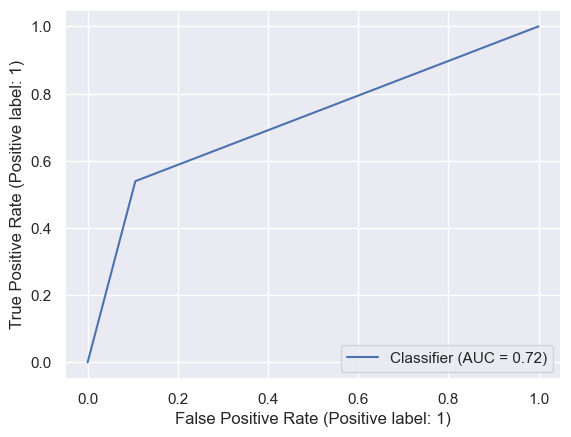

In [221]:
# ROC curve & AUC
RocCurveDisplay.from_predictions(y_test, y_test_pred1)
plt.show()

- AUC is 0.72, that means 72% of the classifier’s predictions are correct across all classification thresholds.

#### The main difference between logistic regression and decision trees is that logistic regression models the relationship between the predictor variables and the outcome variable as a linear function, while decision trees create a hierarchical tree structure to model the relationships between the variables. 
But since this is the case where the result is binary (meaning its either 0 or 1), Logistic Regression is specifically designed for binary classification problems, where the goal is to predict one of two possible outcomes. It estimates the probability of a binary outcome based on one or more predictor variables. Logistic regression is simple to interpret and it doesn’t require much computational resources. This makes it a good choice when the target variable is binary and the relationship between the predictors and the response is linear. 

##### Hence from these 2 models we can see that :
- Both of their AUC are the same
- The accuracy for the Decision Tree model from the train dataset is higher compared to the Logistic Regression model BUT the accuracy for the Decision Tree model from the test dataset is lower compared to the Logistic Regression model.
- The difference between accuracy from the train dataset and test dataset is minimised in the Logistic Regression model compared to the Decision Tree model.


### Prediction for diabetes